In [1]:
!apt-get update 
!apt-get install default-jdk
!pip install -U -q konlpy
!pip install -U -q gensim

Hit:1 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jdk is already the newest version (2:1.8-59ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [0]:
# -*- coding: utf-8 -*-
from collections import Counter
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from gensim.corpora import Dictionary, TextCorpus
from gensim.models import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx
import numpy as np
import math
import matplotlib.pyplot as plt

In [0]:
## 주제 2개

nation = '음~  야, 어?  차 봐::, 시커매::, 오늘 황사 장난 아니지 않냐? 장난 아니네, 뚜껑이 노란데, 무슨, 아니 나는 여기::, 어,  다, 이 차는 별로 안 - 이거는 차가  하얗잖아 지금, 음::. 차가:: 짙은 색깔일수록 - 어. - 누래::. 지금 흰색 차는 잘 모르겠는데, 이것두,  이거랑 저 앞에 차 봐 봐. 이거 하얗잖아. 음::. 멀리서 보면. 오늘 황사  진짜 심해. 장난 아니다,  아까의 그게:: 잘 안 나오네  아니야::, 근데, 오늘:: 우리 조교님이 자꾸:: 황사를 붉은 모래라고 우겨 가지구, 황사? 그니까 내가, 그거 - 노란  모래라구, - 노란 모래 아냐? 그래:: 그래가지구 그랬더니, 그~ 그 옆에  선생님이,  음. 아 맞다구, 황사 노란 모래야::  막. 그래서 누를 황자 쓰는  거 아니야, 음 음::. 그러게. 아 우리 아까  이거, 어, 아 나두  어디 나갔다가 잠깐 들어왔는데, 너무::, 황사가 심해 갖구 선생님들이랑 황사 이야기했는데, 이게 고비사막에서:: - 음. - 날아 날라  오는 거래, 음. 사막에 붉은 모래가 있냐? 노랑 모래지? 그래  붉은 모래는  응. 붉은 모래 아니잖아, 붉은 - 있을  수두 있지만  노란 모래일 가능성이 많아, 음:: 황사가 맞는 거 같애, 어, 지금 봐두 지금 노랗잖아. 음::. 버스랑 차들 뚜껑에 있는 거.  아 근데, 이 뭐지, 우리나라랑, 음. 일본이랑 중국이랑, 음. 돈을:: 들여 갖구, 일본 아니 중국 그 고비사막이 있는 그 근처에, 병풍림처럼::, 음. 나무를  심는 작업 - 방풍림, 어. 음. 방풍림 처럼, 나무를:: 심는 작업에 들어갔대. 너무 황사가, 중국에 환경적 영향이::, 바람이나 그런 거를 통해서, 우리나라랑 일본까지 영향을  미치니까, 음. 그거,  새로  돈을 - 어, - 들여서 하기로 했다고 그러드라? 그게 해야 되는 게, 중국이 갑자기::, 어. 맞어 맞어. 그거 된  나라잖아 그래가지구, 공해가 그렇게 심한데 - 어, - 그게 다 우리나라로 오잖아. 저번에 뉴스 나왔잖아, 편서풍 이랑, 그거  어, 바람에 따라서, 어, 오염 돼 가는 거 이케 짝 짝 짝 물결처럼 돼 가는 거 처럼,  피해를 받는 국가가  우리나라지. 우리나라,  중국 때문에. 하, 근데 지금 장난 아니잖아 무슨 안개 낀 거 같다, 난 이케, 제일 심한 거 같애 내가 본 날 중에. 황사가. 어. 처음인 거 같애. 아니 목이 걸걸하대니까? 기침두 하구, 장난 아니야. 버스 타러 나오는데. 도서관 건물에서, 본관까지 올라오는데 오빠랑 통화하면서 왔거든, 히:: 근데 정말, 이러 와, 이러구. 음::. 숨을 쉴 수가 없을 정도로, 나는:: 아까  막. 선생님들이 그러는 거야. 뭐~ 황사 때문에 문을 못 열겠대, 음. 그래서 안에서 담배도 안 폈대, 음. 그래가지구, 우리가 막 그래서 나는 밖에 잘 안 나가니까. 음. 아:: 그래도 밖이 낫죠::  내가  이랬다? 음 음 음 음 음, 뭣두 모르구, 그랬더니, 너 저기 가 가지구  얼굴 내밀고 있어 보라구.  아:: 그래서 오늘 우리가 도시락 시켜 먹은 거구나::, 그런가 보다, 선생님들이 도시락  먹자 그러 시더라구, 음::. 아?  웬= 웬일이시지 그랬드니 아:: 그래서 도시락  먹는구나, 날씨  때문 이야, 날씨  때문에. 진짜 나가기 싫드라, 집에 들어가면 머리 깜아야지? 뻑뻑거리  아::이 나두 아까,  조교님이랑, 도시락 시켜  먹을 걸, 아무 생각 없었네, 아::, 어제, 집에 가 갖구, 황사가 심하다는 말 들었어 내가 어제 세탁기두 돌려 놨다  아::, 걷어 놨을 껴. 나 안 걷어 놨는데. 빨래  돌려 놓구, 그래서 베란다 창문 다 닫아 놓고 나왔는데. 빨래:: 해 놓으면 노면  뭐 해 문 열어 놓으면 난리 날 텐데, 음::, 해 놓구, 야 차가:: 여기  막힐 - 근데, - 부분이  아닌데, 황사와, 음, 차 막힘 과의 상관관계가 뭐지? 그건 없지, 아::, 시야가 그까 안 비끼면 시야가, 음. 멀지  않아서::, 그리구  여기가:: 안개 자주 끼는 지역이야. 막히잖아 그거랑 - - 똑같나 지금?  야:: 심각하다 진짜,  목이 다 컬컬해. 아까 그 민자가::,  그 게시판에 글 올려놨는데, 음. 너 올렸더라? 음. 너 올리고 바로 위에다 올려 놨는데, 음. 황사 때문에 청주두 장난 아니라구::, 어, 막 숨막힌다구, 근데   - 하::! 걔 안 좋겠다, - 오염된  서울은 어떻겠냐구, 어::, 걱정을 하더라구. 지금 전국적으로 그런가 봐 오빠두  아까, 음::. 여기 광주 장난 아니라구.  그러던데, 헤! 저 차 진짜 심각하다. 저 차는 세차두, 진짜, 같이 안 한 것 같애. 세차 안 한  데다가, 야::  어디 무슨, 정글이나 밀림 속을, 헤매다 온 차 같은데, 아까 그   선생님이, 아:: 오늘 떡칠하고, 머리에다 떡칠하고 무스 바르고 온 애들은, 쫌 고생 즘 하겠다, 집에 가서 머리 깜니라구, 근데 너무 심각하다::, 내일 더 심하다는데,  사고 났나 봐, 어디 어디, 여기 앞에, 차선이 변경하나?  이게, 황사의 영향인가? 무조건 황사에  갖다 붙이는 김지원, 그렇잖아, 차선 변경하나? 차선  변경하 아, 지금  이 시간에 근데 저쪽인데? 아 모르겠다. 으음.  힘든 하루야, 어::, 내일 황사 더 심하대메, 그렇다구 - 어디서 들었어  근데, 뉴스 어디 뉴스에서, 어제:: 중국이 황사 최강이었대, 그니까 오늘 - 어  그래갖구 - 즘, - 그게 건너오려면 내일이::, 우리나라가 최대루, 황사 피해를 많이 볼 거라고 그러던데? 농작물 피해도 입는데. 그렇 지, 음, 농작물 피해, 어 허 비닐하우스 이제 장난이  아닌데. 왜::~  라디오 듣는데,  갑자기 황사 얘기하면서 그러는 거야. 황사:: 피해는 있지만 그게 좋은 점도 몇 가지 있다고 그러면서 그러면써  막. 몇 가지 얘길 해 줬는데 기억나는 거는, 산성비를 중화 시킨다는 - 음::. - 거뿐이 기억이 안 나는데, 근데 어제 새벽에 비도 왔었잖아. 음. 근데,  그 뭐지? 어, 그러면서 여러 가지 얘기를 해 줬다 그러면서, 자연은 역시 우리한테 피해만 주지 않고 항상 - 어. - 뭔가를, 이케  비슷하게 준다구, 어 어어 어, 막 그런 얘기하더라? 근데 지금은 피해만 주는 거 같애. 그까 뭐~ - 아~ 갑자기, 힘들어. 황사 이야기, 다가 삼천포로 빠지는 거 같지만 아까 뭐지 날씨 황사 이야기 막  하다가, 음, 뭐~ 지구 온난화 이야기까지  나왔다? 음::, 음, 음. 그래갖구는, 선생님이, 어~ 요새 신문 보셨냐고, 음. 어 무슨 신문이요. 그랬더니  뭐지 남극인가? 북극인가? 음. 음, 서울에 아홉 배 되는 빙 산이:: - 음. - 녹아서 떨어져 내려 왔대메? 몰라. 그래갖구는, 내가 그걸 오늘 아침에 지하철 타고 오면서 아침에 본   조선일본가? 음, 신문에 보니까 뭐가 이렇게 그림 컬러 그림이 이렇게 이렇게  세 갠가가 있었는데, 음::, 그게 이케 떨어져 나간 그거였다? 맞어, 서울에  아홉 배 짜리 빙산이 녹아 갖구 떨어졌대. 그랬더니 우리 김 선생님이, 그게 안에 둘리가 있다구 서울에 도착해서 팥빙수 팔 거라구 아:: 썰렁 썰렁  썰렁, 그래갖구, 그래갖구는, 그래서, 문제 있다구, 그러면서 서울의 아홉 배면 도대체 그 빙산이 얼마만한 거야? 그게 눈에 보이는 거만 아홉 밴가? 왜냐면 바다 밑에 가 있는 거는  그거의 - 글쎄::, - 면적이 몇 배잖아. 그러면 헤::! 도대체 얼만한 거야, 햐::, 진짜, 지구온난화 쫌 괜찮아졌다 그러더니, 다시  또 그러네, 그래? 하휴,  그게 괜찮아지는 게 정말 괜찮아진 거였겠냐, 잠::시,  그러게. 파뿌리다. 파 못 먹겠다,  대는데,  그러게, 아 근데 파에 원래 모래가 많아,  하긴  그렇겠다, 아::이. 그러게, 또 삼천포야, 괜찮아. 아유. 그렇군. 음~ 제가 교생실습 갔다 온 얘기 해 드릴게요, 그래, 되게 궁금하다, 아~ 그래 갖구::, 저희 교생이 되게 많았었거든요::, 그런데 저는, 인제, 제가 나이가 제일 어렸어요::, 생각보다 나이 많은 사람들이 되게   많았거든요? 음 음, 언니는  구오, 구오학번, 아유~, 그런 얘기를 여기서 하면, 구오 학번까지 막~, 음::, 그래 갖구, 근데, 저는 졸업한지 사 년밖에 안 돼서::, 나도 되게 어리다고 생각을 했었는데, 애들을 보니까 세대 차이가 엄청 나는 거예요, 음::, 걔네들은 정말, 걔들이 메일을 보내면 진짜 못 읽겠는 거예요 막, 난 읽을 줄 아는데, 머~ 아리용, 아리용이 무슨 뜻이에요? 아리용? 음 음, 선생님 아리용  맨날 그러는데 무슨 말인지 몰라 가지고, 모르겠다, 사투리 아니야? 어, 아니에요, 아니거든요, 선생님 아룡? 어, 아룡? 어, 아리용:: 맨날, 아리영 아리영 그거 아니야? 인어 아가씨에 나오는 거? 그래 가지고 맨날 그러고, 어, 특수문자도 엄청 많이 쓰고, 문자를 보내도 알아볼 수가 없는, 음::, 막 그런 문자를 쓰고, 인기가 많았다는 것을, 아예 문자 잘 안 오는데, 막 남자 교생들은::, 걔네들이 음료수 맨날 뽑아주고::, 여자 중학교? 여자  고등학교, 고등학교, 그렇지, 이해해 줘야지, 걔네들은 정말 남자 교생들은 쌓아놓고 먹고, 우리는 뽑아 먹고, 남자 교생이 안 줘 재향이, 음, 문제 있네, 받은   받은 거라고, 못 준대요, 그랬어요, 어~ 근데 교생 실습 나가 가지구::, 우리 그~ 교육 문제를 우리가, 교실 안에서만 배우다가::, 현장에 직접, 음, 가 본 거잖아? 근데 나는   실습을 못 나가봤기 때문에::, 음, 그런 게 궁금한데::, 가르쳐 보면서 가장, 문제가 됐다고 생각하는 점 있어? 그니까 애들이 공부를 안 해요, 음, 공부를 안  한다, 음, 우리 때보다 훨::씬 안 하는 거 같아요, 그~ 혹시 그 학교가, 원래 그~,  인문계 중에서도, 근까 어, 시험보고 들어가는 학교,  요즘엔 내신 성적으로  들어 서울도 내신으로 들어가나? 서울두 연합고사 안 보고, 음 음, 내신으로 들어가지, 근데 요즘에 애들이, 근까 우리 때는 되게 점수가 높았었는데, 고등학교가 또 많이 생겨 가지고는 점수가 되게, 쫌 많이 낮아지고, 그~ 음~ 애들 공부 안 해요. 추세 자체가::, 에, 애들이::, 공부를, 옛날에는 공부를 잘하는 애나 못하는 애나 하는 척은 했는데, 음, 요즘에는 안 하는 애들은 당당하게 안 하는 게 특징인 거 같구, 음, 뭐~ 내가 과외 하거나 학원 강사 할 때두:: 보면, 공부를 하는 애들은::, 언젠가는 또, 언젠가랜다, 누군든지 공부를 하는 애들은 하게 되는데, 그 중간 이하에 아이들이::, 좋은 점이 있다면은, 예전에는 우리 때는 공부 못 하고 그러면 되게 기죽어 있구::, 이케, 구석에, 이케 항상, 전혀::, 어, 의기소침에 있고 이런데, 요즘 애들은, 굉장히 당당하구, 음, 자기 나름대로의 꿈을::, 음, 찾는 거 같애. 근데 부모들은, 여전히 계속 속을 태우고 있고, 음, 명문대 그~ 병이::, 음, 원인이 되는 거 같은데, 음, 꿈은::, 자기 소개서 같은 거 선생님 보여주셨는데, 꿈은 다 서울대 뭐~, 애들이 현실은 전혀 모르고, 서울대 뭐~ 치의예과, 그냥 보통 과도 아니야, 음::, 다 머~  한의  꿈이 한의사고 막~ 의사고, 다 그러면서, 공부는 절대로 안 하고. 내가 가르치는 과외 하는 애 중에는 치의예과 가는 게 꿈인 애가 있는데, 걔는 공부를 잘 하거든? 음, 근데 걔는 특징이, 원래는 자기는 정말 좋은 뜻을 가지고 치과의사가 되고 싶었는데, 음, 애들이 주위에서 그런대, 너 그거 돈 많이 벌어서 하는 거 아니냐::, 꿈에 대해서 막 회의를 가지고 그러거든? 음, 근데 우리 지금 경어 써야 되는 거 아닌가? 아::, 친구 관계같이 친구, 친군가? 그냥 편하게 할게. 예. 어색해지니깐, 그런 거 보면, 요즘 애들은, 참, 물질적인 가치에 대해서두, 되게 빨리 깨닫는 거 같애. 내가 어렸을 때는 내가, 멍청해서 그런지 모르지만, 음, 몰라 어릴 때는:: 돈을 많이 벌어야 된다든가::, 사회적 성공이라는 것이 꼭 돈과 직결되고 이런 것들이 아니라고 생각을 했는데, 요즘 애들은::, 되게 빨리 거기에 눈을 뜨는 거 같은 게, 옛날에 그~ 학원 강사를 하는데 애가, 선생님 집 몇 평이에요? 대화가, 뭐~ 너네 집 차 뭐야, 니네 집 몇 평에 살아, 머 이런 거, 아빠 뭐하셔 막 이런 것들 보면서, 내가 얘네들 어떻게 가르쳐야 되나 생각을 많이 했거든? 그런 면에서는, 세상이 정말 많이 바뀐 거 같고, 음, 참, 앞으로 우리가, 교사가 돼서 아이들을 가르쳐야 되는데::, 숙제가 정말 많이 남겨진 거 같애서::, 그렇거든, 공부를 안 한다는 거 외에는 다른 문제는 없는 거 같애? 공부를 안 하구, 그것만 고쳐지면  퍼펙트 해, 아~ 그리고 애들이:: 정말, 표현을 직접적으로 해야 한다고 그래야 되나? 직설적으로, 예 예, 정말, 근까, 하지 말아야될 말들도, 우리가 친구 같아서 그런 건지 모르겠지만, 그런 말들   되게 많이 해서, 막 상처 받구 막~, 음::, 그런 적이, 제 친구가::, 근까, 첫 시간에 소개를 하고:: 인제, 질문을 하라고, 궁금한 거 있으면::, 질문하라 그러니까, 애들이 남자친구 있냐고::, 그래서 내 친구가, 남자친구 있거든요, 그래서 막 기분 좋아 가지고 막~, 있을 거 같애요 없을 거 같애요 이러니까, 애들이  한결같이 입을 모아서, 없을 거 같애요 막, 그래 갖고 되게 상처를 받았는데, 그냥 있다고 하지, 왜 그랬을까, 근까, 그 중에 또 한 명이::, 요즘 요즘 남자들은 얼굴 안 보니까 있을지도 모르죠 막, 그런 말을, 어::, 못생겼어 친구가? 어~ 그냥,  평범한데, 못생겼구나, 어::, 근데, 내가, 나는, 우리가, 명문대 생이지? 그치? 어띃게, 하이튼, 어띃게, 운이 좋아서 그랬는지, 딱 들어왔는데, 엘리트, 교육에 있어서::, 엘리트 교육이 되게 잘 못됐다고 나는 항상 생각을 해왔 지만, 우리 왜 그~ 교육 행정 시간에 발표했던 것도 있지만, 명문대 병이 고쳐지지 않으면 나는, 그~ 어떤 교육 과정이 나와두::, 먹히지 않는다고, 굉장히 낙관적이지 않게, 비관적, 거의 비관적에 가깝게 보는 편이거든? 어떻게 생각해? 말할 수 없는 거  내가 근까  외국 생활을 해본  건 아니지만::, 이케 다른 나라 비교해 봐두, 우리 나라 뿐만 아니라 어떤 나라든지 다 누구나 성공을 꿈꾸구, 그러기 위한 어떤 중간 과정 으로 명문대를, 다 누구나 한번쯤 생각해 보구::, 어떤 사람이, 누가 뭐~ 명문대 싫다고 하는 사람 어딨겠어 그런데, 우리 나라만, 유독 그런 것도 아니라고 믿는데::, 대부분에 아이들에 생각 속에는, 우리 나라만 입시 전쟁이구, 우리 나라만 입시 지옥이구, 미국에 가면 뭐~, 새로운 세상이 있는 것처럼, 아는 애들이 많거든. 근데 그걸 깨줄려고 되게 노력을 했는데, 음~ 그~ 미국과 우리 나라에 궁극적 차이는, 특징 특질적으로 일단 동::서양 차인 거 같기도 해. 왜냐면 홍콩이나, 중국이나 일본 이런 데도, 중국이지 홍콩이지, 아무튼 중국이나 일본 대만 이런 데두::, 교육열이 장난이 아니고::, 우리 나라 애들 보다도 훨씬, 노력 많이 하고 고생도 되게 많이 하는데::, 그런 그~ 동서양에 차일지는 모르겠는데, 서양 같은 경우는 어떤 차이가 있냐면, 물론 명문대를 나오면, 성공된 삶이 보장되고, 그쪽으로 가기에 훨씬 더 가깝게 가는 거지만::, 걔네들은 명문댈 나오지 않은 사람에 삶도, 어떤 가치가 있다라는::, 그런, 가치가 있고, 또 나름대로 행복하게 사는 법들을 어렸을 때부터 이렇게, 심어주는 거 같은데, 우리는, 그렇지가 못한 거 같은데, 그거는, 명문대를 나온 사람들에 책임인 거 같기도 하거든? 근까 물론 걔네들은, 모~ 자원이 풍부하고, 나라가 잘 살고, 여유가 있어서::, 그게 국가적으로 보장이 되기 때문에 그렇다고 볼 수도 있지만, 우리에 그 태도를 반성해보면, 나부터도, 굉장히 그~, 마치 그~ 명문대에 딱 들어오는 순간, 모든 인생이, 내 것 인양, 그랬던 거 같애. 근데 그거는 뭐~, 우리에 인간성에 문제라기 보다는, 사회적, 그~ 구조 자체가, 그렇다고 보여져. 거, 그래서, 우리가 먼저 바뀌지 않으면,  근데 그게 쉬운 건 아닌 거 같애, 왜냐면, 우리도 어렵게 얻은, 그치? 우리가 거저 얻었다면, 그게 가치도  없겠  그렇게 가치를 가질 수도 없는 거겠지만, 기득권을 포기해야 된단 얘긴데 결국은, 솔직히 힘들 겠지, 어떡해야될까, 근까 입시 위주 교육도, 근까, 지금 교과서가 칠 차로 바꼈잖아요, 우리는 막~ 수업 지도안 짤 때, 음::, 막~ 모둠학습  막~ 늫구 그랬잖아요, 근데 진짜 나가보니까, 모둠   애들이 모둠이 뭔지도 몰라요, 모둠 만들어 본 적이 없어요::, 음 음::, 근까 교과서는 바껴도 선생님 항상  강의하시는 거, 그치, 우리 때랑 달라진 게 하나도 없구::, 애들도:: 막~ 모둠 학습이나 뭐~, 이케 막~, 막 토의 같은 거 시키면 엄청 싫어하고, 더 떠들고, 수업 안  듣고, 음::, 그냥 강의하는 게, 지내 들두, 안타깝 어, 네, 지네들도, 어, 오히려 교재가::, 음, 그~ 강의식 수업에는 되게 맞지 않는 걸루::, 음 음, 근까 교재만 어~, 교재는 안 맞구, 근데 수업 방식은 하나도 안 변하고, 시험도 그대로 나오구, 어, 나두 그걸 절실히 느끼지. 선생님이 따로 문제지 만들고, 선생님이 따로 학습정리 따로 만들고, 프린트, 어, 근까 뭐~ 바뀐 게 아무 소용이 없는, 근까, 모르겠는, 우리는 공부를 그래도 고등학교 다닐 때 공부를 쫌 열심히 했던 애들인가? 그런데, 애들이 많이 달라진 게, 음, 지금 봐 떠 먹여줘야 하는 공부를 하고 있다 라는 생각이 들어. 잘하는 애들도, 근까 내가 가르치는 애들 중에 정말, 뭐~ 서울시 그~ 뭐냐, 영재 교육원 뽑힐 정도로 똑똑한 애두 있는데, 걔도 보면, 시험 공부할 때 딱 보면, 아 이거 시험 나오는 거, 안 나오는 거, 외울 거, 안 외울 거, 이게 딱, 그 뒤는 보지도 않아, 그 외에 암기과목들은 아예 보지도 않구, 정말, 지식에 습득이 어떤 즐거움을 준다던가, 이렇게 우리가 책에서 배웠던::, 그런, 교육에 목적이라든가, 지식에 즐거움, 이런 지식 습득에 즐거움이나  이런 것들은 찾아보기가 힘든 거 같고, 굉장히 무거운 주제를 선택하다 보니까, 아니 처음 시작은 재밌게 했는데, 왜, 이런, 그렇지, 앞으로, 교생실습을 나가야 될 나에게 충고해줄 거 없어? 충고해줄 건, 근까:: 저는, 졸업하고 난 뒤로 한 번도 애들, 근까 과외도 안 했구::, 어, 동생도 없고 그러니깐 애들을 못 만나서 그런지, 그 몇 년 동안 애들이 너무 많이 변해 있고::, 내가 정말 나이가 들었구나  그런 생각, 어머,  진짜 몇 년 차이 안 나는데도 애들 정말, 많이 달라졌다니까요, 그런 생각 많이 들었구, 음~ 그리구 내가 벌써 걔네들을 이해 못하는 거 같애, 벌써 어른이 돼서, 그런 부분이 많이 있는 거 같애, 서글퍼? 서글프기도 하고, 쫌 그케 공부 안 하고::, 청소도 정말 안 하고::, 말도 안 듣고 그런 애들은, 그런 애들까지 다 이뻐 할 수 있을지, 의심스러워 어 그래, 나는 좀 병인 게, 지나가는 교복 입은 애들만 봐도 예쁘거든 나는? 음, 그래서, 그럴 땐 내가 참, 물론 해보질 않았기 때문에, 근까 학원이랑 과외에 환경과는 많이 다를 거 같구, 음, 훨씬 더::, 어떤, 윤리적인 문제라든가, 도덕적인 것두 인격적인 것들도 많이 요구되는 게 학교 현장인데, 그야말로 학원이나 과외는::, 일단은 기술에 그~ 전수가 목적이니깐, 학업 성적을 올리는데, 열을 올리면 그만인데,  그~, 학교 현장에 가면은, 그 외에, 너무 산적한 과제들이 많을 거 같구, 그거 땜에 내가 부딪히구, 그러면서 되게 많이 깨지구, 되게 상처를 받을까봐, 걱정은 좀 되거든, 근데 솔직히, 지나가는 애들만 봐도 다, 예쁘지. 친구들이, 내가 로망스 찍는 다고 그러니깐, 그~ 모지? 원조 교제라고 너무 심한 거 아니냐 그래서 내가, 알았어 너도 소개시켜 줄게 그랬는데, 상처받고 나면 생각이 달라질 거예요, 아~ 근데 곧, 요새는 남자 애들이 더 순하고 더 착하다 그러드라? 음, 남자 애들은, 근데 오히려 정말 여자 애들, 내가 여자라서 그런지 몰라도, 옛날에 학원 나갈 때도 보면, 여자 애들 다루기가 훨씬 힘들어. 음, 정말루, 너무::, 잘 삐지구, 잘 상처받고, 별것도 아닌데두::, 그런 걸 많이 보니까, 남자 애들은 솔직히 그러구 나서두 이케, 한번 확, 그러고 나서 이제, 또 풀어주면 확 땡겨져 오는데, 근데 갈수록 추세가 여자는 남자 애들처럼 바뀌고, 현장에 갔다 온 친구들이 그러더라구, 남자 애들이 오히려 삐지구, 여자 애들이 막 패고 막 그런다고. 왜 그런 일이 생기는 걸까, 그래? 아~ 그리고, 그~, 애들을 이렇게 대할 때, 체벌에 대해서 어떻게 생각해, 체벌, 근까, 요즘에는, 거의, 때리는 일이 거의 없는 거 같애요. 야단두, 음, 거의 칠, 우리 담임선생님이 되게 좋으셨거든요, 남자 선생님이었는데, 음, 애들도 되게 좋아하고 그런 선생님이었는데, 때리고 그런 일 거의 없는 거 같애요. 맞을 짓은 안 해 애들이? 맞을 짓은 많이 하죠, 맞을 짓은 많이 하는데 체벌은  안 된다, 음, 근까, 맞을 짓 많이 하는데 못 때리죠. 그케 반항, 안 그래도 반항적인 그런 애들을, 때리면 진짜, 당장이라도, 니가 생각하는 맞을 짓은 뭔데? 맞을  근까:: 선생님을 봐도 인사도 안하고, 근까 불러도 가지도 않아요::, 으흐~, 선생님이 저기서 화를 내면서 불르고 있는데, 여기서 자기는 혼자 욕하고 있고, 오::, 어~ 굉장한 학교를 갔다왔구나, 아~ 걔가 쫌 그런 얘긴 처음 듣는데, 걔가 쫌 굉장했어요. 걔 하나? 음, 걔 걔는 쫌, 쫌 되게, 저한테도 되게 많이 그러고, 선생님들한테 선생님 지나가도 인사도 안 하고, 불러도 가지도 않고. 난 또 기본적으로 난 나 애들은 정말 다 순수하고 착하다고  믿는 사람이거든? 이게 왜냐면::, 그게, 집단에 속해 있을 때는::, 애들이, 자기도 모르게 그~ 반항적인 그런 게, 또 나와요 또래 집단에 딱 있다 보면은, 근데, 개인적으로 만나서 애들이랑 얘기를 해보면,  분명히, 분명히 다 이유가, 있지 않나 싶구::, 그런 거에 대해서는, 어떤 노력을 기울여야 된다고 생각해 근까 그냥, 무조건 쟤 이상하네, 어 쟤는 문제가 있는데, 포기해야 되겠다고 생각하기에는 너무, 음~ 그 교사로서 또, 엄청난 그~, 문제 의식을 갖고 덤벼들지 않으면 안 되는 거 같은데, 근데 내가 옛날에 학원에 있을 때, 나는 이제 신입, 처음 인제 새내기 교사잖아 근까, 수업 종치기도 전에 막, 들어가 있구, 애들 하나 하나 다 불러 가지구, 상담 다 하구::, 집에도 일일이 하나 하나 전화하고 그랬드니, 나 옛날에 수학 가르쳤는데, 그~ 들어가기 전에, 교구도 다 만들었다 나는? 으, 삼각뿔이면 삼각뿔 다 종이로 만들고, 그랬더니, 거기 오래된 선생님들이, 아유 저게 얼마나 가나  보자구, 그러셨던 기억이 나는데, 나두 결혼을 해서 진짜, 내 자식이  생기구  내 가정이 생기면, 그런 매너리즘에 빠져서::, 그런, 그~ 우리가 지금, 숱하게 욕을 하는, 아줌마 선생님처럼, 돼 있지는 않을까 그런 걱정은 되거든? 지금 내 생각에는 나는, 내가 만약 그런 매너리즘에 빠진 그런 교사가 돼 있다면, 중간에 그만두고  싶으 그만 둘 생각두 있어. 근까 되게 추해지는 거 같애 사람이, 근데 한편으론 또 이해가 되거든, 그런, 그케 변해가는 것들이, 그만큼 머~ 익숙해지고, 그러는 교사뿐만 아니라 우리가,  교사한테는 너무 윤리적이구 인격적인 걸 많이 요구하다 보니까 그러는데::, 어떤 조직에 속해 있어두::, 누구나 다 매너리즘은 오는 거구, 솔직히 교사에 대한 처우가 그렇게 좋은 편은, 아니잖아? 아니구 그러니까 이해는 되는데, 내가 그런 모습이 돼 있다는 게 되게 싫고, 그래서, 음~ 쫌 속상하고, 그 담에 임용 체계에 대한 불만은 없어? 임용 체계요? 이대로가 탁:: 좋아? 뭘 어떻게 해야 할까요? 시험을, 시허  시험을 바꾸고 싶으세요? 문제는:: 근까, 공립 하구 사립에 비율이 오십대 오십이라는 거거든? 음, 그러면, 공립에서 수요하지 못하는 그 인원들을, 사립에서 이제 그만큼, 충당이 된다는 얘긴데::, 음, 현재 임용고시 체제로서는, 지금에 수요를, 지금에 공급을, 다 감당을 못하고, 실직자들이 많아지잖아? 우리  근데  사립이 그렇게 많아요? 적재래, 오십 퍼센트. 정말   많은  사립은 다 임용고시 다 안 보고 들어가는 거죠, 없지, 근까 사립에 문제가, 음, 우리 나라에 오십 퍼센트라는, 엄청난 비율을 가지고 있으면서::, 임용이 전적으루::, 이사장 및 그~ 이사진에  결정에  의해서, 그~ 그건, 된다라는 점에서::, 내가 어떤 경우를 봤냐면은, 내가 얘기한 거 같기도 한데, 옛날에 내가 아는 언니가, 한진,  한진이었나, 한진인가, 딸이었거든? 근데, 그 언니는, 아빠 나 선생님할래  이러니까, 잠깐만 이러드니, 전화를 하더니 얼루, 얘, 되더라고 바로, 한 달인가 두 달 해보더니, 음, 아 적성 아닌 거 같애 그러니까 그만 두는 거야::, 그런 것도 봤고, 또 해태, 무슨 제과, 언니도, 그 언니는 근데 열심히 다니니까, 그 언니한텐 할 말이 없는데, 옛날에 그~ 과외 하던 애, 그~ 학교가, 제단이 육하 제단인데, 육하 제단이, 어선 여섯 육 어찌 하래::, 여섯 명이, 그 이사장이 나이가 되게 많은데, 연세가 되게 높으신데, 음, 자식이, 그~ 월남할 때::, 자식을 북에다 두구, 여섯 명을 북에다 두구 이제 월남을 하신 거야::, 음, 그래서 제단이 육하 육하 제단, 여섯 육, 어찌 하, 근데 그 제단은 비리가 장난이 아니거든, 들어보면,  외손녀 가, 그거 딱 전형적인,  뉴스에 나오는 그~, 혹은 다큐멘터리 같은 프로그램 나오는, 시사 프로그램 같은 데 나오는 거 있잖아, 이 제단에 경우 뭐~, 외손녀가 미술 선생이구 뭐~, 그리구, 교사 수금 문제에 있어서두, 사립에 그런 문제 때문에, 걔네 같은 경우는 영어 선생님이 애길 낳구, 음, 왔는데 영어 선생님이 자리가 없는 거야. 그래 갖구 생물을 가르쳤대 영어 선생님이, 어, 장난이 아니래, 그리고 걔 표현에 의하면, 미술 선생님이 자기보다도 못  그린대, 음, 그런 것들 보면, 결국은 궁극적으루::, 음, 교육에 질에 저하를 갖고 오지 않을까::, 그런 생각이 들구, 그렇다고 내가 잘 가르칠 수 있다는 건 아니지만, 난 지금이라도 시켜주면  열과 성의를 다해서, 언니는 잘하실 거 같애요, 할 생각이 있는데, 근데 보통 사립에 갈 생각을 안 하지 않나? 졸업하구 누가, 근데 난 사립이 가고 싶거든? 어~ 진짜, 개인적으로, 되게 문제가  많은  근까, 나랑 가까이 지내는 선생님 중에, 음, 사립에 계시다 나오신 선생님이 계신데, 음, 일장 일단 설명하시면서, 사립이 제단이, 공교  공기업, 아유 공기업이란다, 대기업이라든가 이렇게, 근까 이사장이, 재단, 재단 이사장이, 학교에   목매이지 않는, 그런 학교 있지, 음, 삼성 재단 현대 재단 이런 데 있잖아, 나 다닌 학교는 태평양 재단이었는데, 우리도 그렇게 비리 같은 거 별로 없었거든, 근데 이제, 그 이사장이, 직업이, 재단 이사장인 경우에, 비리가 되게 많고, 그리구, 나는 왜 그러냐면 내가 사립을 중학교를 나오고, 고등학교는 공립을 나왔는데, 난 지금도 사립 선생님들하고는::, 음, 연락하고, 술도  마시  한 잔하고 막 이러거든? 공립 선생님들 얼굴도 기억 안 나, 어:: 진짜, 열과 성의 자체가 완전 차이가 너무 나구, 난 우리 중학교 를 너무너무 좋아하고 막~, 되게 되게 좋아 했던 기억이 나는데, 그리고 이렇게 소속감을 주구, 책임감을 주구, 내 학교라는 생각이 없으면 나는 별루, 음::, 그렇고 뭐~ 떠돌아다니는 것두 별로 안 좋고, 근데, 장점이 자 단점이, 안 떠돌아다니는 건 좋은데 대신 인제, 트러블이 있는 선생님이 있을 경우에, 옮기질 않으니깐, 그래, 두구 두구 그게 또 힘들다 그러시더라, 어:: 맞어, 어떤 게 좋은 건지는 모르겠는데, 아무튼, 나는 사립을 개인적으로 가고 싶어하는 사람으로서, 현재 임용 체제에 문제점을, 얘기하고 싶지. 음, 근데 또 어떻게 뽑겠어 또 근데, 그치? 임용고시 다 봐서 뽑으면 안 되나? 그런 방법도 있는데, 음, 사립 고등학교 같은 경우는, 대학교랑은 달라서::, 어떤 그~ 사립 학교를 운용한다고 해서, 음, 크게 머~ 이문이 남는다거나  그런 건  아니거든? 장사 속으로 못하는::, 그런 거기 때문에, 이사진들이 첨에 학교를 세울 때는, 그런 자기들만에 그~, 내 손녀도 선생님 시켜주고, 뭐~ 그런 계산이 어느 정도, 바탕이 깔려있기 때문에, 포길하지 않으려고 한다고 하더라고. 그래 가지구, 또 문제가 있고, 사실 국가에 봉사하기 위해서 만든 학교면 깨끛이, 응? 깨끛이 운영하는 게, 사람에 도리지만, 또 사람이기 때문에 그게 안 되는, 그런 것도 있다고 들은 거 같애. 그럼, 너가 생각할 때는, 계속 할말이 없니? 음, 그래 그러면, 이쯤에서 대화를 마치고, 수업을 들어가자. 음, 몇 시예요? 수고했어. 십분.'

In [0]:
## 군대 nation

nation2 = '''
음~ 야,어? 차 봐::,시커매::,오늘 황사 장난 아니지 않냐?장난 아니네,뚜껑이 노란데,무슨,아니 나는 여기::,어, 다,이 차는 별로 안 -이거는 차가 하얗잖아 지금,음::.차가:: 짙은 색깔일수록 -어.- 누래::.지금 흰색 차는 잘 모르겠는데,이것두, 이거랑 저 앞에 차 봐 봐.이거 하얗잖아.음::.멀리서 보면.오늘 황사 진짜 심해.장난 아니다, 아까의 그게:: 잘 안 나오네 아니야::,근데,오늘:: 우리 조교님이 자꾸:: 황사를 붉은 모래라고 우겨 가지구,황사?그니까 내가,그거 -노란 모래라구,- 노란 모래 아냐?그래:: 그래가지구 그랬더니,그~ 그 옆에 선생님이, 음.아 맞다구,황사 노란 모래야:: 막.그래서 누를 황자 쓰는 거 아니야,음 음::.그러게.아 우리 아까 이거,어,아 나두 어디 나갔다가 잠깐 들어왔는데,너무::,황사가 심해 갖구 선생님들이랑 황사 이야기했는데,이게 고비사막에서:: -음.- 날아날라 오는 거래,음.사막에 붉은 모래가 있냐?노랑 모래지?그래 붉은 모래는 응.붉은 모래 아니잖아,붉은 -있을 수두 있지만 노란 모래일 가능성이 많아,음:: 황사가 맞는 거 같애,어,지금 봐두 지금 노랗잖아.음::.버스랑 차들 뚜껑에 있는 거. 아 근데,이 뭐지,우리나라랑,음.일본이랑 중국이랑,음.돈을:: 들여 갖구,일본 아니 중국 그 고비사막이 있는 그 근처에,병풍림처럼::,음.나무를 심는 작업 -방풍림,어.음.방풍림처럼,나무를:: 심는 작업에 들어갔대.너무 황사가,중국에 환경적 영향이::,바람이나 그런 거를 통해서,우리나라랑 일본까지 영향을 미치니까,음.그거, 새로 돈을 -어,- 들여서 하기로 했다고 그러드라?그게 해야 되는 게,중국이 갑자기::,어.맞어 맞어.그거 된 나라잖아 그래가지구,공해가 그렇게 심한데 -어,- 그게 다 우리나라로 오잖아.저번에 뉴스 나왔잖아,편서풍이랑,그거 어,바람에 따라서,어,오염 돼 가는 거 이케 짝 짝 짝 물결처럼 돼 가는 거처럼, 피해를 받는 국가가 우리나라지.우리나라, 중국 때문에.하,근데 지금 장난 아니잖아 무슨 안개 낀 거 같다,난 이케,제일 심한 거 같애 내가 본 날 중에.황사가.어.처음인 거 같애.아니 목이 걸걸하대니까?기침두 하구,장난 아니야.버스 타러 나오는데.도서관 건물에서,본관까지 올라오는데 오빠랑 통화하면서 왔거든,히:: 근데 정말,이러 와,이러구.음::.숨을 쉴 수가 없을 정도로,나는:: 아까 막.선생님들이 그러는 거야.뭐~ 황사 때문에 문을 못 열겠대,음.그래서 안에서 담배도 안 폈대,음.그래가지구,우리가 막 그래서 나는 밖에 잘 안 나가니까.음.아:: 그래도 밖이 낫죠:: 내가 이랬다?음 음음 음 음,뭣두 모르구,그랬더니,너 저기 가 가지구 얼굴 내밀고 있어 보라구. 아:: 그래서 오늘 우리가 도시락 시켜 먹은 거구나::,그런가 보다,선생님들이 도시락 먹자 그러시더라구,음::.아? 웬= 웬일이시지 그랬드니 아:: 그래서 도시락 먹는구나,날씨 때문이야,날씨 때문에.진짜 나가기 싫드라,집에 들어가면 머리 깜아야지?뻑뻑거리 아::이 나두 아까, 조교님이랑,도시락 시켜 먹을 걸,아무 생각 없었네,아::,어제,집에 가 갖구,황사가 심하다는 말 들었어 내가 어제 세탁기두 돌려 놨다 아::,걷어 놨을 껴.나 안 걷어 놨는데.빨래 돌려 놓구,그래서 베란다 창문 다 닫아 놓고 나왔는데.빨래:: 해 놓으면노면 뭐 해 문 열어 놓으면 난리 날 텐데,음::,해 놓구,야 차가:: 여기 막힐 -근데,- 부분이 아닌데,황사와,음,차 막힘과의 상관관계가 뭐지?그건 없지,아::,시야가 그까 안 비끼면 시야가,음.멀지 않아서::,그리구 여기가:: 안개 자주 끼는 지역이야.막히잖아 그거랑 -- 똑같나 지금? 야:: 심각하다 진짜, 목이 다 컬컬해.아까 그 민자가::, 그 게시판에 글 올려놨는데,음.너 올렸더라?음.너 올리고 바로 위에다 올려놨는데,음.황사 때문에 청주두 장난 아니라구::,어,막 숨막힌다구,근데  -하::!걔 안좋겠다,- 오염된 서울은 어떻겠냐구,어::,걱정을 하더라구.지금 전국적으로 그런가 봐 오빠두 아까,음::.여기 광주 장난 아니라구. 그러던데,헤!저 차 진짜 심각하다.저 차는 세차두,진짜,같이 안 한 것 같애.세차 안 한 데다가,야:: 어디 무슨,정글이나 밀림 속을,헤매다 온 차 같은데,아까 그  선생님이,아:: 오늘 떡칠하고,머리에다 떡칠하고 무스 바르고 온 애들은,쫌 고생 즘 하겠다,집에 가서 머리 깜니라구,근데 너무 심각하다::,내일 더 심하다는데, 사고 났나 봐,어디 어디,여기 앞에,차선이 변경하나? 이게,황사의 영향인가?무조건 황사에 갖다 붙이는 김지원,그렇잖아,차선 변경하나?차선 변경하아,지금 이 시간에 근데 저쪽인데?아 모르겠다.으음. 힘든 하루야,어::,내일 황사 더 심하대메,그렇다구 -어디서 들었어 근데,뉴스 어디 뉴스에서,어제:: 중국이 황사 최강이었대,그니까 오늘 -어 그래갖구 -즘,- 그게 건너오려면 내일이::,우리나라가 최대루,황사 피해를 많이 볼 거라고 그러던데?농작물 피해도 입는데.그렇지,음,농작물 피해,어 허 비닐하우스 이제 장난이 아닌데.왜::~ 라디오 듣는데, 갑자기 황사 얘기하면서 그러는 거야.황사:: 피해는 있지만 그게 좋은 점도 몇 가지 있다고 그러면서그러면써 막.몇 가지 얘길 해 줬는데 기억나는 거는,산성비를 중화시킨다는 -음::.- 거뿐이 기억이 안 나는데,근데 어제 새벽에 비도 왔었잖아.음.근데, 그 뭐지?어,그러면서 여러 가지 얘기를 해 줬다 그러면서,자연은 역시 우리한테 피해만 주지 않고 항상 -어.- 뭔가를,이케 비슷하게 준다구,어 어어 어,막 그런 얘기하더라?근데 지금은 피해만 주는 거 같애.그까 뭐~ -아~ 갑자기,힘들어.황사 이야기,다가 삼천포로 빠지는 거 같지만 아까 뭐지 날씨 황사 이야기 막 하다가,음,뭐~ 지구 온난화 이야기까지 나왔다?음::,음,음.그래갖구는,선생님이,어~ 요새 신문 보셨냐고,음.어 무슨 신문이요.그랬더니 뭐지 남극인가?북극인가?음.음,서울에 아홉 배 되는 빙산이:: -음.- 녹아서 떨어져 내려 왔대메?몰라.그래갖구는,내가 그걸 오늘 아침에 지하철 타고 오면서 아침에 본  조선일본가?음,신문에 보니까 뭐가 이렇게 그림 컬러 그림이 이렇게 이렇게 세 갠가가 있었는데,음::,그게 이케 떨어져 나간 그거였다?맞어,서울에 아홉 배 짜리 빙산이 녹아 갖구 떨어졌대.그랬더니 우리 김 선생님이,그게 안에 둘리가 있다구 서울에 도착해서 팥빙수 팔 거라구아:: 썰렁 썰렁 썰렁,그래갖구,그래갖구는,그래서,문제 있다구,그러면서 서울의 아홉 배면 도대체 그 빙산이 얼마만한 거야?그게 눈에 보이는 거만 아홉 밴가?왜냐면 바다 밑에 가 있는 거는 그거의 -글쎄::,- 면적이 몇 배잖아.그러면 헤::!도대체 얼만한 거야,햐::,진짜,지구온난화 쫌 괜찮아졌다 그러더니,다시 또 그러네,그래?하휴, 그게 괜찮아지는 게 정말 괜찮아진 거였겠냐,잠::시, 그러게.파뿌리다.파 못 먹겠다, 대는데, 그러게,아 근데 파에 원래 모래가 많아, 하긴 그렇겠다,아::이.그러게,또 삼천포야,괜찮아.아유.그렇군.
'''

In [0]:
news = '''
최저임금 이의신청 기간이 그제(7월 30일) 종료됐습니다.
경영계의 압박이 거세지고 있는 가운데 정부는 이번 주 안으로 재심의 여부를 결론낼 방침으로 알려졌습니다.
박기완 기자와 자세한 이야기 나눠보겠습니다.
박 기자, 앞서 경총과 중기중앙회가 내년 최저임금에 대해 이의를 제기했죠?
네, 경영자총협회와 중소기업중앙회는 각각 지난달 23일과 26일 내년도 최저임금안에 대한 이의제기서를 제출했는데요.
쉽게 말해 최저임금위에서 결정한 내년 최저임금이 부담을 감내할 수준이 아니니 다시 논의해야 된다는 건데요.
경총은 "경기둔화 국면에서 2년 새 최저임금이 29.1% 인상된다면, 경영여건이 열악한 기업은 한계 상황으로 내몰리고 고용 부진이 심화할 것"이라고 주장했습니다.
중기중앙회는 "중소제조업체의 노동생산성 증가 속도보다 최저임금 인상 속도가 2배 빠르다"고 설명했는데요.
또 소상공인과 영세중소기업 등 지불주체의 지급 능력도 고려되어야 한다고 강조했습니다.
최저임금 이의제기 기간은 지난달 30일까지였는데요.
고용부는 이르면 오늘(1일) 이의제기에 대한 결론을 회신하고 내년 최저임금을 최종 고시할 예정입니다.
특히 소상공인업계의 반발이 거센데, 행정 소송도 제기했죠?
네, 그렇습니다.
소상공인연합회는 어제(31일) 서울행정법원에 내년도 최저임금 고시 집행정지 가처분 신청을 냈습니다.
앞서 지난해 소상공인연합회가 고용노동부를 상대로 낸 최저임금 고시 취소소송 결과가 오는 10일 나올 예정인데, 그때까지라도 내년도 최저임금 고시를 정지하라는 겁니다.
내년 최저임금 확정 고시일은 오는 3일인데요.
이번 가처분 신청도 정부의 최저임금 재심의를 압박하기 위한 행동의 일환으로 볼 수 있습니다.
고용부의 선택만 남은 것 같은데, 재심의 가능성은 있는 건가요?
사실상 어렵다는 의견이 지배적입니다.
1988년 최저임금법 시행 이후 23차례 비슷한 이의제기가 있어 왔지만 한번도 수용되지 못했기 때문인데요.
최근까지도 정부는 이에 대해 부정적인 입장을 일관되게 보여 왔습니다.
김동연 경제부총리는 지난달 27일 국회 상임위에 출석한 자리에서 최저임금 재심의는 여러 가지 고려해야 할 요소가 있어서 신중히 검토해야 한다"며 사실상 부정적 입장을 나타냈습니다.
또 재심의를 할 경우 노동계의 반발이 워낙 강하기 때문에 또 다른 큰 혼란이 예상됩니다.
하지만 최근 실물지표와 심리지표가 잇따라 악화된 것으로 나오면서 경기 둔화에 대한 우려가 커지고 있고, 정부 내에서도 정책기조 변화가 감지되고 있어 경영계 일각에서는 전격적인 재심의 결정에 대한 기대감도 나오고 있습니다.
만약 고용부가 재의 요청을 받아들이면 열흘 이상 기한을 정해 최저임금위원회에 재심의를 요구하고 최저임금 수준을 다시 결정하게 됩니다.
ㅡㅡㅡㅡ
저희 연합뉴스TV는 지난 4월부터 매주 1차례씩 15차례에 걸쳐 '아기는 우리의 희망' 연속기획 리포트로 저출산의 원인과 현주소, 그리고 대안을 짚어봤습니다. 
엉킬대로 엉킨 저출산 문제 어떻게 풀어야 할까요? 
경제부 이준흠 기자와 함께 기사에서 다하지 못한 취재 뒷이야기를 들어보겠습니다.
안녕하세요.
이 기자, 사실 저출산 문제 해법은 누구나 다 알고 있잖아요. 
단순하게 얘기하면 아이 낳아 키울 돈있고, 집있고, 아이 돌볼 시간있으면 되는 건데요. 
결국 경제적 여유가 있어야 하는 것 아닙니까?
맞습니다. 이미 정답은 나와있는데 이 정답을 푸는 과정을 찾는 게 어려운거죠. 
저만해도 아기를 갖는다는 상상을 해보면 당장 이 월급으로 빚 갚고 생활비 쓰면 남는 게 없다, 또 육아휴직을 쓰기도 쉽지 않고 쓴다해도 수입이 줄어드는데 감당이 될까 이런 걱정부터 들거든요.
지금도 합계출산율이 1명을 간신히 넘는 수준이잖아요. 
경제적 문제로 애를 낳지 않는다면 지금처럼 청년실업이 심각한 상황에서 출산율이 앞으로 더 떨어질 수도 있을텐데요.
맞습니다. 졸업을 앞둔 4학년 여대생 60명한테 물어봤습니다. 
결혼이나 출산을 반드시 하겠다는 사람은 손을 들어보라 했더니 1~2명 밖에 안되는 겁니다.
취업은 힘들고, 일자리를 구해도 임금이 적거나 야근이 많고, 학자금이며 집값 갚느라 돈을 모을 수도 없어서 출산은 커녕 결혼조차 생각하기 힘들다고 학생들은 입을 모았습니다. 
특히 여학생들은 아무리 시대가 바뀌었어도 내가 육아부담을 다 짊어져야 한다 이런 불안감이 있는 거예요. 
그럴바에는 2세를 생각하기보다 나 자신의 행복이 먼저다, 그게 충족이 안되는 상황에서 출산은 사치다, 이런 인식이 점차 커지는 걸 느꼈습니다.
저출산 예산에 여태 쓴 돈이 수백조원이 넘는다는데 별 성과가 없었잖아요. 
이번 정부 들어 좀 바뀐 대책이 있나요?
지금까지 정부는 아기를 낳지 말라고 한다거나 혹은 낳으라고 하면서 대놓고 출산계획을 통제하려고 했는데요. 
1970년~80년만 해도 부부가 아이를 네다섯명씩 낳던 때가 있었거든요. 
딸아들 구별말고 둘만 낳아 잘 기르자, 덮처놓고 낳다보면 거지꼴을 못 면한다, 이런 TV광고를 틀었어요. 
그러다 2,000년대 들어서는 출산율이 너무 떨어지니까 반대로 혼자는 외롭다, 가장 좋은 선물은 동생이다 이런 표어를 내걸었죠. 
하지만 앞으로는 아이를 낳으라마라 하는 대신 아이 낳고 키우기 좋은 환경을 만들겠다는 게 현정부의 방침입니다. 
앞서 신혼부부와 청년을 위해 주택 163만채를 공급하고 8세 미만의 자녀를 둔 부모는 근무시간을 1시간 줄인다고 밝혔고요. 
오는 10월에 구체적인 대책을 담은 저출산 기본계획을 발표한다고 하니 아직은 좀 더 지켜봐야할 것 같습니다.
정부 대책도 중요하겠지만 일 가정 양립, 흔히 말하는 워라밸이 잘 지켜져야 애를 돌볼 시간이 있을텐데요. 
기업문화도 좀 바뀌어야겠죠?
맞습니다. 제가 취재과정에서 들은 한 대기업의 이야기인데요. 팀장이 여직원이 일을 잘해서 마음에 들었대요. 
그래서 "나는 너를 여자로 안본다. 남자로 본다. 일 열심히 하면 승진도 시켜주고 밀어주겠다" 그러니까 이 분이 "저는 팀장님처럼 일하면 결혼 못해요"라고 대답했다는 거예요. 
노골적 불평등은 많이 없어졌을지 몰라도 '이상적인 근로자상'은 여전히 바뀌지 않았다는 겁니다. 
육아부담이 없고 회사에만 올인할 수 있는 근로자입니다. 
문제는 이런 근로자를 기준으로 회사업무나 인력계획이 짜져있으니까 한명이 빠지면 나머지 부서원들이 독박업무를 쓰는 거예요. 
출산을 하겠다, 육아휴직을 쓰겠다 그러면 굉장히 불성실한 직원이 되는 겁니다. 
회사 입장에서야 마땅한 인력 구하기도 쉽지 않다고 항변하겠지만 우리 기업의 노무관리 역량이 이정도로 부족하냐 이렇게 한탄하는 전문가도 있었습니다.
앞으로 주 52시간 근무도 활성화 될 거고 점점 개인시간을 중시하는 시대로 바뀔텐데요. 
기업이 어떤 방향으로 가야할까요?
전문가들은 '가족친화경영'을 꼽고 있습니다. 
우수한 인재를 붙잡아두기 위해서라도 워라밸을 잘 지켜야 한다는 거죠. 
그렇지 않으면 인재들이 떠난다는 겁니다. 
또 가화만사성이라고, 가정생활이 원만한 직원이 업무수행능력이 더 좋다는 연구결과는 이미 많이 나와 있습니다. 
기업의 미래를 위해서라도 경영방침을 바꿔야 한다는 지적입니다.
여성이 출산을 선택하지 않는 이유는 많이 분석을 했습니다만 남성도 힘들다, 이런 반응도 많았죠.
그렇습니다. 사실 여성이 혼자 짊어질 짐이 아니기 때문이죠. 그런데 좀 재미있는 분석이 있습니다. 
남성이 힘든 이유 중 하나로 꼽히는 게 역설적으로 '여성의 독박육아' 때문이라는 건데요. 
최근 한 휴대전화 광고를 보면 엄마가 출장간 사이 남편이 전화를 해서 애가 당근을 안 먹는다고 하니까 김에 싸서 먹이면 잘 먹는다 이렇게 대답하는 장면이 나오는데요. 
여태까지 여성이 육아를 도맡는 환경에서 자라다보니 남성들이 육아방법을 잘 모른다는 겁니다. 
저희가 혼자서 두 아들을 키운 아버지를 만나봤는데요. 
그분 말씀이 한부모 가족 모임을 가면 엄마들끼리는 "언니 나 힘들어, 커피한잔하자"하면서 금방 친해지는데, 본인은 꿔다놓은 보릿자루처럼 있다가 온다는 겁니다. 
아토피에 무슨 연고가 좋더라하면서 육아정보도 나누는데 본인은 쉽게 못 어울리겠더란 거죠.
저희 아버지 세대만 해도 아버지는 가족을 위해 밤낮없이 돈버는 것 밖에 모르는 무뚝뚝한 모습이지 않습니까? 
자식들이 그런 헌신을 알아주면 좋은데 보통은 관계형성이 잘 안되고 사이가 서먹하고 가정에서 소외되는 경우가 많죠. 
앞으로 육아는 부부가 함께 하는 것이라는 인식이 좀 더 퍼져야 이런 문제도 해결될 것 같습니다.
네, 다른 주제로 한번 넘어가보죠. 
저번주였습니다. 저희와 인터뷰한 7자녀, 다자녀 가구 어머니가 네티즌들을 고소했습니다.
무슨 일인가요?
네, '다둥이 가족의 속사정'이라는 제목으로 저희가 기사를 내보냈습니다. 
다자녀 가구를 보는 시선이 곱지 않다, 이들이 피부로 느낄 수 있는 혜택이 사실 많지 않다는 현실을 꼬집은 기사인데요. 
포털에서 댓글 2,600개가 달렸어요. 그런데 댓글 중에 정말 악성댓글이 많았습니다. 
햄스터처럼 애를 싸질렀다, 부모가 미개하다, 당사자들에게는 큰 상처가 되는 내용이었습니다. 
저희와 인터뷰한 어머니뿐 아니라 자식들도 댓글을 읽었다고 해요. 
애들이 평소에 워낙 이런 얘기를 많이 들어왔는데 이번에는 이 사람들 절대 봐주지 말라고 오히려 신고를 독려했다고 합니다. 
결국 시민단체까지 나서서 이런 혐오표현을 막을 수 있게 제도를 정비해달라고 정부와 국회에 요청하기까지 했습니다.
아기 많이 낳으면 애국자다, 이런 말 있잖아요. 
오히려 그런 대접을 안하고 있네요.
다자녀 가정뿐 아니라 적극적으로 출산을 원하는 난임부부 역시 비슷한 문제로 힘들어 하고 있습니다. 
저희가 만난 난임부부는 부적도 써보고 길일을 받아서 부부관계도 해보고 착상탕 같은 별의별 약까지 먹어도 아직 효과를 못 본 분이었습니다. 
치료과정도 힘든데 주변시선 탓에 너무 지치고 힘들어서 인터뷰 도중에 눈물을 흘리셨어요. 
처음에는 걱정을 하다가도 나중에는 문제있는 사람처럼 대한다는 거죠.
사실 난임 대다수는 원인불명이거든요. 이런 걸 보면서 우리사회가 '정상적인' 가족이라는 개념을 만든 것 아닌가 하는 생각이 들었습니다.
남성과 여성이 결혼을 해서 아이를 한 두명, 많이 낳으면 세명 정도 낳고 가정을 꾸리는 모습이죠. 
여기서 벗어나면 비정상으로 보는 겁니다. 
저출산 문제는 결국 국가의 문제 이전에 가족의 문제거든요. 저출산 이야기를 하면서 우리사회가 여태 '비정상'으로 바라봤던 가족들, 미혼모나 입양가정, 이런 사람들에 대한 시선이 어땠는가도 한번 되돌아 봤으면 합니다.
------
건강톡톡 시간입니다. 
지난 1월 국내에서 가장 작은 몸무게, 302 그램으로 태어난 '사랑이'가 지난주에 퇴원해 많은 감동을 줬는데요. 
'사랑'양의 이 1%의 기적에는 부모와 의료진의 눈물겨운 노력이 있었습니다.
못다한 이야기들 오늘 박광식 의학전문기자와 나눠봅니다. 
사랑이 출생부터 퇴원까지, 정리 한번 해주시죠. 
네, 아기 이름이 '이사랑'인데요. 
지난 1월 키 21.5센티미터, 몸무게 302그램, 국내에서 가장 작은 아기로 태어나 169일 만에 건강하게 퇴원했습니다. 
출산예정일보다 거의 넉 달 일찍 태어나 생존이 처음에 불투명했습니다. 
사랑이 부모님이 찍은 핸드폰 영상 속에 그 애절함이 고스란히 담겨있습니다. 
생후 5일째, 온통 푸른 빛인데, 저기 살짝 움직이는 사랑이 보이시나요?
인큐베이터에서 광선치료를 받는 중입니다.
생후 2주차 튜브만큼 가느다란 팔과 다리를 번갈아 휘저으며 사투를 벌입니다. 
작은 체구에 심장박동 센서, 산소 수치 센서, 수액관, 인공호흡기 등 각종 줄들이 연결돼있습니다.
태어난 지 2개월째, 이젠 작은 손으로 얼굴을 가리기도 하고요. 
사랑이가 큰 눈으로 엄마와 아빠를 말똥말똥 쳐다봅니다. 
마침내 생후 5개월을 넘긴 지난 12일 신생아 집중치료를 끝내고 건강한 모습으로 퇴원했습니다. 
이젠 키가 42센티미터 몸무게는 3킬로그램으로 키는 2배, 몸무게는 10배 늘어 집으로 가게 된 겁니다. 
소감을 물어봤는데요. 
도움 주신 분들도 너무 많아서... 그런 예쁜 딸로 컸으면 합니다.
302g으로 태어나서 이렇게 건강하게 퇴원한 사례가 있나요? 
사랑이처럼 단 한 차례 수술도 받지 않고 모든 장기가 정상적으로 발달한 건 세계적으로 드문 일입니다. 
담당 의사조차도 사랑이 태어났을 때 생존을 장담 못 했는데요. 
사랑이는 출생 직후에 심장이 뛰지 않아 소생술로 겨우 심장이 뛴 적도 있었고, 몸무게가 295그램까지 줄기도 했습니다.
국내에서 최근 3년 동안 500그램 미만 초미숙아는 163명이 출생했는데요. 
생존율은 28%에 불과합니다. 
300g 이하로 내려가면 생존 사례가 거의 없고요.
하지만 사랑이는 1% 미만 생존한계를 극복해냈고, 결국 국내에서 보고된 초미숙아 생존 사례 중 가장 작은 아기로 기록됐습니다. 
뿐만 아니라 전 세계에선 26번째, 가장 작은 아기로 등재될 예정입니다. 
사랑이는 생존한계를 어떻게 극복할 수 있었을까요? 
신생아 집중치료를 담당했던 의료진의 노력, 부모의 헌신, 사랑이의 생명력이 어우러진 결관데요. 
일단 치료가 쉽지 않은 게 아무리 작은 주삿바늘도 아기 팔뚝 길이와 비슷하다 보니까 찔러 넣는 게 쉽지 않고요. 
또 피를 몇 방울만 뽑아도 바로 빈혈이 발생하기 때문에 채혈조차 쉽지 않아서 의료진의 노하우 정말 주효했습니다. 
무엇보다 엄마의 모유가 결정적이었는데요. 
미숙아 합병증인 괴사성 장염을 예방할 수 있는 유일한 방법이 모유 수유라는 말에 사랑이 엄마는 단 하루도 거르지 않고 모유를 유축했습니다. 
정말 쉬운 일이 아닌데 매일 병원으로 모유를 가지고 와 사랑이를 응원한 겁니다. 
그 결과, 사랑이는 괴사성 장염이 발병하지 않았고, 600그램됐을 때 응답이라도 한 듯 드디어 인공호흡기를 떼고 적은 양의 산소만으로도 숨을 쉬는 기적을 보여줬습니다. 
엄마·아빠가 아이를 갖는 과정도 순탄치만은 않았다면서요? 
네, 맞습니다. 
사랑이 아빠가 마흔한 살, 엄마가 마흔두 살, 흔히 말하는 고령임신입니다. 
결혼한 지 9년 만에 인공수정을 통해 임신에 성공했지만, 임신중독증이 생겨서 예정일보다 사오 개월 앞당겨 제왕절개로 사랑이를 낳은 겁니다. 
비단 사랑이 부모뿐 아니라 국내 35세 이상 고령 산모가 늘면서 인공수정으로 임신하는 경우가 증가하는데요.
자연임신에 비해 미숙아 분만율이 높습니다. 
이를 방증하는 게, 초미숙아 산모에서 인공수정한 경우가 2016년 25%로 해마다 증가추세고요. 
국내 고령 산모 구성비가 26%인데, 초미숙아 출산 중 고령 산모 구성비는 38%로 훨씬 높습니다. 
그래서 사랑이의 기적은 더욱 소중한데요. 
저희 집사람도 동안이지만 초고령 임산부입니다. 인공수정을 통해서 임신을 해서 또 인큐베이터까지 거쳐서 정말 요새 말하는 그렇게 결혼을 늦게 하고.
최근 국내 출산율은 급감하는 반면, 산모 고령화, 인공임신 증가로 미숙아 출산율이 높아지는 상황입니다. 
이번 사랑이를 통해 국내 초미숙아 치료에 새로운 가능성과 희망이 열리길 기대해봅니다. 

'''

In [0]:
ami = '좋아요 자 음 이번은 프로젝트를 위한 킥오프 미팅입니다 음 그리고 음 이것은 우리가 앞으로 25분 동안 할 일입니다. 우선 서로 확실하게 하기 위해서 저는 로라고 프로젝트 매니저입니다 다시 한번 자기소개 해주시겠어요 음 좋습니다 안녕하세요 저는 데이비드고 산업 디자이너입니다 그렇군요 저는 앤드류이고 음 마케팅팀입니다 음 전 크레이그이고 사용자 인터페이스입니다 전문가죠 좋아요 자 음 저희는 새로운 리모콘을 만들고 있어요 오 누가 진짜 여기 있는지 기록해야 해요 데이비드 앤드류 크레이즈 맞죠 그리고 모두 제시간에 도착했고요 음 그래서 디자 흠 새로운 리모콘을 만들고 있습니다 음 보이시는대로 독창적이고 유행에 민감하고 사용자가 사용하기 편리해보입니다 음 디자인에는 세가지 단계가 있습니다 음 다들 이메일로 뭘 받았는지 잘 모르겠네요 어떤 것을 받으셨나요 음 방금 이 프로젝트가 무엇인지에 대한 프로젝트 발표를 받았습니다 리모콘을 설계하는 그게 다예요 다른건 못받았습니다 다들 같은거 받으셨나요 흐음 흠 흠 네 같은 것 같네요 다들 똑같은거 받으신건가요 좋아요 음 그럼 개인적인 일을 하고 나서 회의를 하는게 좋겠네요 그리고 이 과정을 세번 반복하세요 음 그리고 이제 화이트보드를 사용할게요 음 좋아하는 동물을 그려서 그것의 좋아하는 특징을 요약해보세요 누가 먼저하실래요 좋아요 좋군요 제가 하겠습니다 그게 좋겠어요 잘 됐네요 좋아요 그럼 여기 이거 맞죠 음 좋아요 아무 멋있어요  좋아 제가 가장 좋아하는 동물은 비글 같아요 음 특지 가장 좋아하는 특징 이게 맞나 음 네 아마 기본적으로 제가 동물에 대해 가장 우선적으로 생각하는 것은 그들이 그들의 가족에게서 많은 육체적인 애정을 많이 받고자 해야 한다는 거예요 그리고 네 그럼 그들은 매력있고 음 건강하고 튼튼할거예요 그래서 이건 파란색이예요 파란 비글 비글 가족 맞아 맞아 좋아요 귀여워요 음 제가 가장 좋아하는 동물은 원숭이예요 얘네는 작고 귀엽고 털이 많아요 그리고 어 유인원행성이 실제로 존재한다면 그들과 함께 거기로 갈거예요 좋아요 멋있네요 장비가 너무 많아요 원하는만큼 계속 해도 돼요 우리가 엄청 많은걸 얘기할 필요는 없으니까요 좋아요 너무 서두르지 마세요 어쨌든 좋아요 저는 비글에 대해서 더 많은 것을 얘기해 드릴 수 있어요 친구 이제 본인 차례예요 엣취 왜 우리가 본인을 다시 깨워야 할 수도 있어요 제가 뭘 좋아하는지 잘 모르겠어요 지금 생각해봐야겠어요 인상주의자들 그릴 수가 없네요 고랜가요 음  네 음 어쨌든 잘 모르겠어요 생각했을 때 가장 먼저 떠오르는 동물이예요 음 네 가장 큰 이유는 저는 대부분 동물들한테 알러지를 가지고 있어요 털을 가진 동물들한테 그래서 생선이 자연스러운 선택이죠 아 음 네 저는 고래같은 종류를 좋아해요 와서 보이는대로 다 먹어치워요 맞아요 그리고 그들은 꽤나 악의가 없고 유순하고 매력적이예요 음 좋아요 아이고 아직도 제가 뭘 그려야할 지 잘 모르겠네요 음 근데 진짜 잘 그렸네요 어쨋던 꼬리가 엄청 커요 제 생각엔 저는 일단 개를 골랐어요 하지만 제가 그린건 다른 종류의 개예요 제 제가 가장 좋아하는 동물은 저희 집에 있는 제 개예요 음 그래서요 별로 그 친구처럼 생기진 않았네요 사실은 돼지 같아보여요 사실은 아 어쨌든 여기서 개가 보이는데요 네 그래요 친절하시네요 저는 이제 수탉이 보여요 아 무슨 종인가요 음 이 친구는 잡종이예요 음 그리고 제가 이 친구를 좋아하는 이유는 음 아마 꼬리를 흔드는 것 때문일거예요 굉장히 친근하고 쾌활하고 그리고 언제나 반가워해주고 그리고 다정한 편이예요 음 그리고 엄 그리고 이 친구는 엄청 작아요 그래서 그렇게 큰 공간을 차지하지 않아요 음 그리고 어 그리고 자기 꼬리를 쫓아다니는 재밌는 일을 해요 보고 있으면 재밌죠 그리고 그가 자기 쫓 자기 꼬리를 쫓아다니고 있다는 걸 알아요 알아요 아는 것 같아요 저녁을 먹고 난 후에 그렇게 해요 갑자기 일어나서 거실을 돌아다니면서 자기 꼬리를 쫓아가기 시작해요 흐음 그럼 이건 저녁을 먹고 난 후의 개네요 네 맞아요 아마 이 친구가 어릴 때 이렇게 하면 관심을 많이 받았어서 습관이 된 것 같아요 그럴지도 모르겠네요 그러게요 좋아요 음 이거 어디서 찾았어요 밑에서 좋아요 자 저희 이제 무엇을 해야 하죠 음 자 어 우리 이제 프로젝트 자금에 대해 논의해야해요 음 브리핑에 따라서 음 우리는 이 리모콘을 25유로에 팔거고 어 5천만유로를 버는 것이 목표입니다 음 그리고 이 것을 국제적인 규모로 판매할 거고요 그리고 어 12유로 이상 비용이 발생하지 않았으면 해요 판매가격의 50퍼센트죠 알겠습니다 음 다시 한번 검토해 볼까요 네 좋아요 어 그럼 2시로 하죠 어 생산비용과 같은 비용은 12유로지만 판매가격은 판매가격이 도매인가요 소매인가요  그냥 다요 음 잘 모르겠네요 좋은 질문이라고 생각합니다 우리 판매 우리 판매 아 잠시만 제 생각에는 그냥 저희 가격인 것 같아요 왜냐하면 유통업체들이 얼마에 팔든 그건 그 사람들한테 달린 거니까요 맞는 것 같네요 흐으음 좋아요 하지만 또 잘 모르겠네요 그러니까  저희가 국제적으로 판매할 것이라는 사실이 전체적으로 저희가 디자인하는 방식과 관련이 있다고 생각하시나요 있다고 생각합니다 그래요 음 흠 흐음 음 지금 그 DVD 플레이어 같은 것들에 그 영역 주파수나 그런 것들에 대한 문자 어 다른 키패드 스타일이나 심볼 같은 것들 그런 것들이 있는지 궁금해요 오 맞아요 영역이나 그런 것들 맞아요 맞아요 흠 어 리모콘에 있어서 그래야한다고 생각하시나요 저는 저희의 리모콘이 얼마나 복잡한지에 따라 달려있다고 생각하는데 음  모르겠네요 네 디자인 관점에서 보면 이해가 될 거예요 왜냐하면 유럽언어처럼 복잡한 글자들은 더 많은 버튼이 필요하니까요 알겠어요 네 그렇겠네요 어 그리고 국제적인 것에 가격도 있어요 제 생각에는 가격이 특정 지역의 시장에는 매력적일 수 있겠지만 다른 지역에서는 또 다를 것 같아요 그러니까 나라의 경제사정 같은 면에서 사람들이 물건 사는데 돈을 얼마나 쓰느냐와 같은 그냥 특 음 그냥 특징 그러니까 아니면 기초용품의 위치 런던에서는 25유로 짜리 리모콘이 대박이 났는데 그리스에서는 안 그럴 수도 있고 그러니까 이런거죠 네 아 무슨 말 하는지 알겠어요 마켓팅 마켓팅적으로 좋은 생각이야 아이고 이거 다 적어야 하는데 음 자 좋아요 일단 우리가 말했던 정보들에 대해 몇가지 가정을 할게요 생각 중이예요 음 트렌디하다는 것은 기본적이거나 음 아니면 표준적인거랑 다르다는 것을 의미하겠죠 음 네 그리고 갑자기 궁금해진건데 25유로로 판매하는거 이게 그 프리미엄 제품 같은 건가요 그러니까 네 네 리모콘 하나에 드는 비용과 같은 허어 그러니까 25유로 음 제 말은 그게 대략 18파운드 정도 되는데 마죠 아니면 그것보다 더 드나요 16 17 18 파운드 음  네 네 그렇습니다 음 글쎄 리모콘을 사 본 적이 없어서 잘 모르겠네요 산게 좋은건지 아닌지 음 모르죠 잘 그렇죠 하지만 리모콘이 멋지고 매력적으로 보여야할 것 같아요 음 맞죠 흠 저 좀 이쪽으로 갈게요 좋아요 재정적인 문제에서 더 말할 것 있으신 분 있나요 혹시 다른 회사와 뭐 비교할만한 정보 있나요 그 아뇨 없어요 유용할 것 같긴 하지만 없네요 얼마에 살 수 있는지 알고 있으면 다른 네 흠 음 음 어 리모콘에 대해서 논의하는 것에 대해 제가 흥미롭다고 느낀 것이 있는데 제가 말했던 것처럼 리모콘은 사람들의 소비습관에 의식적으로 접근하는 물건은 아니라고 생각합니다 신발을 사면 딸려오는 신발끈 같은 것이죠 그냥 딸려오는 거예요 맞아요 맞아요 오 회의 5분 남았습니다 우리 조금 뒤쳐졌네요 어떤 뜻인지 아시겠어요 그러니까 사람들이 리모콘을 찾는 방법이 그러니까 사람들이 텔레비전 세트를 만들어요 아마 리모콘도 만들겠죠 아니면 TV세트를 가지고 있는 사람들이 그 세트의 리모콘에 질려서 새로운 리모콘이나 다른 것을 원하는거예요 맞아요 맞네요 나는 그러니까 음 저희 부모님은 나가서 리모콘을 사오셨어요 왜냐면 음 집에 있는 것들마다 네다섯개의 리모콘을 가지고 있어야 한다는 것이 지겨워서요 그래서 음 그들에게 있어서 리모콘을 사는 이유는 통제할 기기가 얼마나 많냐 였어요 하지만 네 그렇죠 자 그럼 봐요 기능에서 우선순위 중 하나는 많은 용됴를 결합하는 거예요 네 맞죠 엄 그래서 그 것이 우리 리모콘 메인 디자인의 목표가 되어야 한다고 생각하시나요 그러니까 음 위 위성 그리고 일반 텔레비전 음 그리고 VCR이나 다른 모든 것들에 대한 저는 그렇게 생각해요 네 네 어 그게 음 아마 우리가 사용할 수 있는 다른 부품 테크놀리지의 성공적인 예시는 팜 파일럿입니다 스크래치 보드 같은 것 들에서 카메라 MP3 핸드폰 등으로 변해나갔어요 음 모든 안건 음 저 리모콘 시장에 새로운 것을 추가할 수 있는지 궁금합니다 예를 들자면 집에 있는 조명 같은 것들 아니면 음 네 아니면 심지어 그 뭘 보고 싶은지에 대한 메모들 메모에는 어 나 이거 이거 보고 싶다고 쓰겠죠 그리고 나중에 보고 아 이거 좋은 아이디어다 할거예요 부가 기능이죠 네 네 어 네 개인적으로 저는 집에서 텔레비전 세트의 오디오 비디오랑 제 DVD 플레이어와 CD 플레이어가 결합했어요 그래서 실제로 같이 기능했는데 각각 다른 리모콘을 가지고 있어요 이거는 좀 이상하긴 하죠 흐음 엄 그리고 이 친구는 엄청 작아요 그래서 그렇게 큰 공간을 차지하지 않아요 음 아시다시피 소리나 다른 모든 것들은 전부 하나의 시스템이예요 그렇지만 각각 그것들의 작은 음 부분 음 네 저희 이제 남은 몇분동안 꽤 빠르게 끝내야해요 음 다른 건 없는지 확인해볼게요 좋아요 음 자신들이 사용한 리모콘이 마음에 들지 않거나 새로운 리모콘에서 정말 좋다고 생각하는 부분에 대해 더 추가적으로 하실 말씀 있으신 분 있으신가요 우리는 계속 리모콘을 잃어버리죠 리모콘을 잃어버린다 좋아요 음 이걸 찾는 건 정말 어려운 일이예요 아시다시피 제 말은 보통은 정말 작다는거예요 우리가 리모콘을 쓰려고 하면 그건 소파 뒤로 미끄러져 들어가고 탁자 밑에서 발에 채여요 음음 흐음 흐음  어 그걸 찾으려고 하면 그러니까 휘파람을 불거나 아니면 엄청 높은 소리를 내서 리모콘이 소리를 내는거죠 그게 어 우리가 추가해야하는 것이라고 생각하나요   네 네네 알고 계시네요 정말 좋은 아이디어 같아요 네 어 좋아요 저희 가족의 처음 리모콘에는 케이블이 있었어요 그 케이블은 리모콘과 TV 사이에 이어져 있었고 엄청 컸어요 믹서기에 있는 버튼처럼 그리고 엄 그게 지금 생각해보면 괜찮아요 하지만 사실 그건 모르겠네요 그게 탁자 위에 거대한 더러운 것들이었어요 아마 어떻게 하면 더 효율적인 유선 모델이 될 수 있을지 생각해볼만한 것 같아요 엄 네 그러겠네요 아이고 아직도 좀 원시적인 느낌이네요 어 음 터치 스크린이라던가 그런거 네 뭐 그런 것들 아니면 기술적으로 합리적인 것들 네 좋아요 어허 좋아요 아마 그건 우리 산업 디자이너에게 달려있는 것 같네요 그게 그거 그러니까 기 어 기능적으로 더 나아지지 않을 수 있어요 하지만 가지고 있지 않는 것은 매력적이예요 알잖아요 지금 사람들 집에 있는 것들은 더더 세련되어져가고 있어요 음 더 좋은 물건들 그리고 더 보기 편해요 네 좋아요 좋아요 어쨌든 탐험할 가치는 있어요 어 자 그럼 어 마무리하자면 다음 회의는 30분 후에 하겠습니다 그리고 회의는 제 시계로 10시에서 12시 사이에 진행될 거에요 엄 그 사이에 산업 디자이너는 리모콘의 실제 작업 모델을 작업해주세요 어떤거 하시는지 아시겠죠 엄 사용자 인터페이스랑 기술적인 기능은 제 생각에 저희가 이제까지 무슨 말을 했고 무엇을 해야할지 알고 계실거라고 생각해요 어 음 음 그리고 마케팅 임원 넵 리모콘이 어떤 요구사항을 만족해야하는지에 대한 것을 생각해주세요 그리고 여러분 모두 지시사항은 이메일로 보내드리겠습니다 네 알겠습니다 네 그럼 다음 단계는 기능적인 디자인입니다 제 생각에 그리고 네 그리고 회의의 마지막 단계입니다 네 제 생각보다 더 빨리 메시지를 받았네요 네 음 끝내기 전에 저희가 같은 단계에 있다고 확실히 합시다 엄 저희 커피머신 등등에 대한 예시를 받았죠 네 으흠 어허 네 맞아요 엄 저희 가정에 우리 텔레비전 리모콘이 텔레비전을 뛰어넘는 기능을 가지고 있나요 아니면 텔레지번 기능에 맞춰 디자인을 해야하나요 잘 모르겠어요 아 네 좋아요 그게 빨리 해주세요 이제 끝내야해요 음 저는 저희에게 달려있다고 생각해요 아마 독특한 판매 포인트를 원하시는거죠 그러니까 엄 네 네 맞아요 좋아요 제 생각에 생산비용이 한가지 요인인 것 같아요 네 네 왜냐하면 리모콘에는 뚜껑이 있으니까 그러니까 그 가격을 어떻게 끼워맞출 수 있는지에 달린 것 같아요 음 네 좋아요 음흠 좋아요 네 제 생각에 이게 주요 요인일 것 같습니다 네 알겠습니다 자 회의를 끝내도록 하죠 그럼 엄 네 알겠습니다 그럼 어 와주셔서 감사합니다 좋아요 '

In [0]:
hm='''
문재인 대통령이 오늘 모디 인도 총리와 정상회담을 열었습니다.
양국 교역 규모를 5백억 달러 규모로 늘리고 이를 위해 우리 기업인의 사실상 무비자 입국에 합의했습니다.
문 대통령은 쌍용차 대주주인 마힌드라 그룹 측에 쌍용차 해고자 복직 문제에 관심을 가져달라고 요청했습니다.
뉴델리에서 김도원 기자입니다.
한·인도 정상회담은 문재인 대통령에 대한 공식 환영식과 함께 시작됐습니다.
예포 21발이 발사되는 가운데 입장한 문 대통령은 코빈드 대통령과 인사를 나누고 의장대를 사열했습니다.
이어진 모디 총리와의 정상회담에서 양국 정상은 양국 간 교역 규모를 오는 2030년까지 지금의 두 배가 넘는 5백억 달러로 늘리기로 했습니다.
이를 위한 첫 가시적 조치로 우리 기업인이 사실상 인도에 무비자 입국이 가능하도록 했습니다.
비자 간소화를 통해 국민들이 겪는 불편함을 줄여 나가기로 했습니다. 관광, 청소년, 학술, 교육 등 인적교류를 확대하고, 다양한 문화 협력 사업도 추진할 것입니다.
구체적으로는 우리 석유화학 제품과 인도 농수산물에 대한 상호 시장개방에 합의하고 양국 간 포괄적 경제동반자 협정 개정 협상을 조속히 끝내기로 했습니다.
뭄바이 남부해안도로 건설 등 우리 기업의 인도 인프라 건설사업 참여, 첨단 과학기술 협력, 중소·벤처기업 간 교류 확대도 추진하기로 했습니다.
2020년에는 모디 총리가 우리나라를 찾는 등 양국 정상의 상호 방문 정례화에도 뜻을 모았습니다.
특히 평화 구축에서 큰 성공을 기원하고, 인도 국민을 대표해서 말씀드립니다. 다시 만나요, 고맙습니다.
두 정상은 양국 주요 기업인들이 참석한 CEO 라운드테이블로 자리를 옮겨, 기업 간 협력에도 힘을 실었습니다.
문 대통령은 또, 쌍용차 대주주 마힌드라 회장에게 해고자 복직 문제에 관심을 가져달라고 특별히 요청했습니다.
양국은 이번 정상회담 논의 내용을 토대로 양국 관계 사상 최초로 한·인도 비전성명을 채택했습니다.
인도와의 관계를 주변 4강 수준으로 격상하겠다는 문 대통령의 의지가 반영된 것으로 풀이됩니다.
-----------------
굳이 큰 공사를 하지 않아도 조명만 살짝 바꾸면 집 분위기가 상당히 달라질 수 있습니다.
오늘 정보충전은 은은하게 빛을 내는 조명, 이른바 무드등의 종류와 공간연출법에 대해 소개합니다.
어두운 밤이 되면 더욱 아름답게 빛이 나는 집입니다. 
이 부부는 특히 조명에 관심이 많았는데요.
분위기를 로맨틱하게 바꿔주는 LED 촛불과 고래등!
화사한 꽃병이 놓인 듯한 벽등과 거실 전체를 책임지는 키 큰 전등까지!
무드등을 켰을 때와 껐을 때, 분위기가 확 달라집니다.
그런데 이 무드등! 단순히 인테리어 기능만 하는 게 아닙니다.
노란색 조명이 하얀색 조명보다 눈도 덜 피로하고 잠도 더 잘 오는 것 같아요.
저녁시간에 무드등을 켜놓았더니 숙면에 효과적이었다는데요.
잠들기 2시간 전부터 주위를 어둡게 하면 수면 호르몬인 멜라토닌이 분비돼 우리 몸은 잘 준비를 시작하기 때문입니다.
노란색이나 주황색 계통의 빛을 쐬게 되면 뇌는 밤으로 인지해 축적된 멜라토닌이 분비되어서 멜라토닌에 의해서 우리가 졸음을 유발하고 잔다고 이해하면 될 것 같습니다.
분위기는 물론 숙면까지 책임지는 무드등!
모양과 크기, 기능에 따라 그 종류가 천차만별이라고 하는데요.
주방부터 살펴볼까요. 칼과 뜨거운 불을 사용하는 주방에는 무드등보다는 밝고 환한 백색등이 좋습니다.
하지만 식탁에는 천장에 매다는 이른바, 펜던트 등을 많이 설치하는데요.
등 하나만 켰을 뿐인데 분위기가 달라지죠.
거실은 주로 바닥에 세워 사용하는 큰 등, 이른바 플로어 스탠드를 많이 사용하는데요.
천장등보다 눈의 피로감이 적어 휴식을 취하는데 도움이 됩니다.
그렇다면, 침실은 어떨까요. 
탁상용 무드등이 사용도 편하고 포인트 주기에도 좋은데요.
놓을 자리가 마땅치 않다면 벽에 붙이거나 늘어뜨리는 형태도 좋습니다.
요즘에는 감성을 담은 무드등이나 무드등 하나로 두 가지 기능을 사용하는 기술력을 가진 무드등이 인기입니다.
향기와 불빛이 함께 뿜어져 나오는 디퓨저 무드등! 
옷방이나 화장실에 두면 유용하고요.
이 집게 무드등엔 사진 같은 걸 꽂아두면 색다른 분위기 연출할 수 있겠죠.
최근엔 첨단기술을 접목한 무드등도 나오고 있는데요.
스마트폰 앱을 통해 조명 색을 바꾸는 건 물론이고요.
시끄러운 알람 시계 대신 알람 조명을 통해 보다 편안하게 잠에서 깰 수도 있습니다.
다 자동으로 되니까 정말 편한 것 같아요. 쉽고 좋고요.
추억하고 싶은 사진으로 나만의 무드등도 만들 수 있습니다. 
3D 프린트를 활용하면 되는데요.
연인들이나 아이를 출산한 부모들이 아이의 성장 과정에 따라 지속적으로 변경이 가능한 무드등이기 때문에 이런 분들에게 인기가 많습니다.
평면에 인쇄하는 2D 프린터와 달리 3D 프린터는 한 층씩 차곡차곡 쌓아올려 입체적으로 만들어내는 것인데요.
이렇게 만든 3D사진을 사각 무드등 틀에 꽂아주면 은은하고 입체감 있는 나만의 무드등이 탄생합니다.
종류도, 기능도 다양합니다. 
무드등의 변신도 계속되고 있습니다.
정보충전이었습니다.
------------------
요즘 진짜로 착각할 정도로 감쪽 같은 합성 사진과 영상이 인터넷을 통해 퍼지고 있죠.
사회적 문제가 될 정도인데, 어떤 것이 가짜인지 가려낼 수 있는 인공지능 기술이 국내에서 개발되고 있습니다.
이재희 기자가 보도합니다.
인터뷰 중인 오바마 전 미국 대통령, 갑자기 트럼프 대통령을 비난합니다.
간단히 말해, 트럼프 대통령은 완전히 머저리입니다.
이 인터뷰는 사실 인공지능이 합성한 가짜 영상입니다.
언뜻 보면 진짜라고 믿을 정도로 정교한 합성 기술.
여론조작에 악용될 수 있다는 지적까지 나옵니다.
사회를 분열시키고, 선거에 영향을 미치려고 하는 사람들이 있다는 것을 압니다. (이기술을 이용해) 어떤 시점에서 누군가 다음 단계로 나아가 무기를 만들 것입니다.
국내에서는 가짜 사진이 사회적 문제가 되고 있습니다.
문재인 대통령이 쓴 글귀를 악의적으로 조작한 사진이 SNS에 확산되는가 하면.정부 행사에 참석한 것 처럼 가짜 사진을 만든 뒤 보도한 기업도 있습니다.
음란 합성사진은 유명인과 일반인을 가리지 않습니다.
1~2년 뒤에는 눈으로는 진위를 구분할 수 없을 정도의 기술이 나올 것이라는 전망까지 나옵니다.
더 큰 피해를 막기 위해 선진국들을 중심으로 합성 여부를 가릴 수 있는 인공지능 기술 개발이 진행중입니다.
합성 사진은 배경부의 글자 같은 것이 흐리게 나온다거나 약간 점박이 같은 것이 나온다든지, 특이한 패턴들이 나오거든요. 그런 패턴들을 인식할 수 있게끔, 그런 것을 찾을 수 있는 네트워크를 설계를 해서.
정부는 우수 기술을 보유한 단체들을 경쟁을 통해 선발해 집중 지원하겠다고 밝혔습니다.
KBS 뉴스 이재희입니다.
----------------------
진에어에 이어 아시아나 항공도 외국인 등기이사가 불법 재직한 사실이 드러났습니다.
국토교통부는 이와 같은 사실을 알면서 묵인한 것으로 드러나 논란이 커지고 있습니다.
이하린 기자가 보도합니다.
아시아나항공의 법인등기부등본입니다.
미합중국인 A 씨가 2004년 3월부터 6년여 동안 사외이사, 즉 등기이사로 재직한 것으로 나와 있습니다.
재미교포인 A 씨는 박삼구 금호아시아나그룹 회장의 지인으로 2000년대 중반 아시아나항공에 기내식을 납품한 사업가로 알려졌습니다.
미국 국적인 A 씨의 등기임원 재직은 엄연한 불법입니다.
국가기간산업인 항공업을 보호하기 위해 관련법이 외국인은 국적 항공사의 등기임원에 오를 수 없도록 규정하고 있기 때문입니다.
위반 시 면허를 취소할 수 있습니다.
한진그룹 저비용 항공사 진에어와 똑같은 법 위반 사례입니다.
진에어가 면허 취소 위기에 몰린 것도 미국 국적인 조현민 전 대한항공 전무가 2010년부터 6년 동안 등기이사에 올라 있었다는 사실이 밝혀졌기 때문입니다.
아시아나 항공은 이에 대해 사외이사는 경영에 직접 관여하지 않는 만큼 항공법상 외국인 임원의 절격 사유에 해당하지 않는 것으로 봤다고 해명했습니다.
국토교통부의 무책임한 대처도 논란을 키우고 있습니다.
국토교통부는 조현민 전 전무의 진에어 불법재직 사실이 불거진 지난 4월, 국내 8개 항공사를 상대로 2008년 이후 임원 재직 현황을 조사했습니다.
이 과정에서 A 씨의 불법재직 사실이 드러났지만 국토부는 이를 묵인했습니다.
국토부 관계자는 시간이 오래된 일인 데다 당시 아시아나항공이 어떤 경위로 A씨를 등기임원으로 했는지, 당시 해당 부서에서 이를 알고 있었는지 등을 확인하기 어려웠다고 밝혔습니다.
전후 사정을 제대로 파악하지도 않은 채 문제를 서둘러 덮어버렸다는 겁니다.
'기내식 대란'과 기업 총수의 갑질 논란이 확산하는 가운데, 등기이사의 불법 재직 사실까지 드러난 아시아나.
거기에 국토부의 미온적 대처까지 도마 위에 오르면서 항공 업계에 대한 국민들의 신뢰도 추락하고 있습니다.
YTN 이하린입니다.
'''

In [0]:
text=ami

In [0]:
class Sentence(object):

    def __init__(self, text, tokens=[], index=0):
        self.index = index
        self.text = text
        self.tokens = tokens
        self.counter = Counter(self.tokens)
        self.pagerank = 0

    def __unicode__(self):
        return self.text

    def __str__(self):
        return str(self.index)

    def __repr__(self):
        try:
            return self.text.encode('utf-8')
        except:
            return self.text

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index

In [0]:
## Token 클래스 정의
## 한개의 토큰가 속한 문장의 인덱스와 내용을 저장
class Token(object):

    def __init__(self, index, word, tag):
        self.index = index
        self.word = word
        self.tag = tag
        self.tfidf = 0

    def __unicode__(self):
        return self.word

    def __str__(self):
        return self.word

    def __repr__(self):
        try:
            return self.word.decode('utf8')
        except:
            return self.word

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index

In [11]:
# -*- coding: utf-8 -*-
stopwords = ['음', '어', '아', '네', '흠', '흐', '음', '흐음', '자']
# useful_tags = ['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number']
useful_tags = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Alpha', 'Number']

def sen2tokens(idx, sen):
    twitter = Twitter()
    tokens = []
    for word, tag in twitter.pos(sen, norm=True, stem=True):
        if (word in stopwords) or tag not in useful_tags:
            continue
        tokens.append(Token(idx, word, tag))
    return tokens

def text2sentences(text):
    kkma = Kkma()
    tmp_sentences = kkma.sentences(text)
    sentences = []
    for idx,sen in enumerate(tmp_sentences):
        tokens = sen2tokens(idx,sen)
        sentences.append(Sentence(sen, tokens, idx))
    return sentences

sentences = text2sentences(text)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
print("총 문장 개수: ", len(sentences), '\n')

for i, sen in enumerate(sentences):
    print(i, sen.text)
    print(sen.tokens)
    if i==5: break

총 문장 개수:  247 

0 좋아요
[좋다]
1 자 음 이번은 프로젝트를 위한 킥 오프 미팅입니다
[이번, 프로젝트, 위, 킥, 오프, 미팅, 이다]
2 음 그리고 음 이것은 우리가 앞으로 25분 동안 할 일입니다.
[것, 우리, 앞, 25분, 동안, 하다, 일, 이다]
3 우선 서로 확실하게 하기 위해서 저는 로라고 프로젝트 매니저입니다
[우선, 서로, 확실하다, 하다, 위해, 저, 로라, 프로젝트, 매니저, 이다]
4 다시 한번 자기소개 해 주시겠어요
[다시, 한번, 자기, 소개, 해, 주다]
5 음 좋습니다
[좋다]


In [13]:
tokens = []
for sen in sentences:
    tokens.extend(sen.tokens)
tokens[:5]

[좋다, 이번, 프로젝트, 위, 킥]

In [14]:
tokens[0].tfidf
ttt = tokens[:5]
ttt[0].tfidf

0

In [15]:
tokens_len = [len(sen.tokens) for sen in sentences]
tokens_len[:5]

[1, 7, 8, 10, 6]

In [16]:
mean_token = sum(tokens_len)//len(tokens_len)
step_size=mean_token
print("step_size:", step_size)
one_topic=round(len(tokens)*0.2)
print("one_topic: ", one_topic)
neighbors=round(one_topic/step_size)
window_size=round(one_topic/2)
print("window_size: ", window_size)

step_size: 6
one_topic:  329
window_size:  164


In [0]:
tfidv = TfidfVectorizer().fit(map(str, tokens))

In [0]:
def l2_norm(a):
    return math.sqrt(np.dot(a, a))

def cosine_similarity_def(a, b):
    return np.dot(a,b) / (l2_norm(a) * l2_norm(b))

In [0]:
## 1. tf-idf
## 블락별 유사도 계산 
## vec_to_sim_dic에 저장
## 키값: 블락의 경계 토큰 인덱스값
start = 0
mid = window_size
end = mid+window_size
sim = {}
stop = False
while(stop==False):
    if(end > len(tokens)):
        new_win = (len(tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, tokens[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, tokens[mid:end]))]).toarray().reshape(-1)
#     print(start, mid, end)
    
    sim[mid] = cosine_similarity_def(b1,b2)
#     print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

In [20]:
len(sim)

221

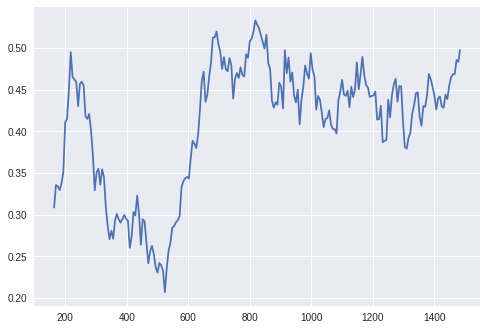

In [21]:
## 유사도 그래프
## x축: 경계 토큰 인덱스
plt.plot(sim.keys(),sim.values())

In [0]:
sim_val = np.array(list(sim.values()))
minium = sim_val.min()

In [23]:
## 1. 가장 작은 유사도를 가진 토큰 인덱스 찾기
boundary_list_min=[key for key, val in sim.items() if val == minium]
boundary_list_min

[524]

thresh:  0.3314615058564282
[164, 182, 296, 332, 338, 344, 350, 356, 362, 368, 374, 380, 386, 392, 398, 404, 410, 416, 422, 428, 434, 440, 446, 452, 458, 464, 470, 476, 482, 488, 494, 500, 506, 512, 518, 524, 530, 536, 542, 548, 554, 560, 566, 572]


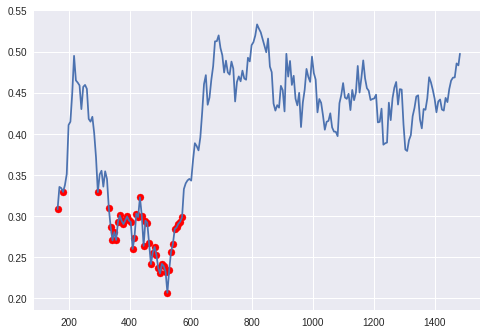

In [24]:
## 2. thresh로 거르기
sim_mean = sim_val.mean()
sim_std = sim_val.std()
thresh = sim_mean - sim_std
print("thresh: ", thresh)

boundary_list_thresh = [key for key, val in sim.items() if val < thresh]
print(boundary_list_thresh)

## 그래프
thresh4graph = {}
for k,v in sim.items():
  if v < thresh:
    thresh4graph[k] = v
    
plt.plot(sim.keys(),sim.values())
plt.scatter(thresh4graph.keys(), thresh4graph.values(), c='red')

In [25]:
## 2. thresh로 거르기
## 점 사이의 간격이 하나의 토픽보다 크면 그 이전의 경계들은 하나로 취급
tmp_list = []
tmp_idx = 0
for i in range(len(boundary_list_thresh)-1):
  if (boundary_list_thresh[i+1]-boundary_list_thresh[i])>window_size:
    tmp_list.append(boundary_list_thresh[tmp_idx:i+1])
    tmp_idx = i+1
tmp_list.append(boundary_list_thresh[tmp_idx:]) #경계는 마지막 것도 확실하게 챙기자
print(tmp_list)


[[164, 182, 296, 332, 338, 344, 350, 356, 362, 368, 374, 380, 386, 392, 398, 404, 410, 416, 422, 428, 434, 440, 446, 452, 458, 464, 470, 476, 482, 488, 494, 500, 506, 512, 518, 524, 530, 536, 542, 548, 554, 560, 566, 572]]


In [26]:
## 2. thresh로 거르기
## 앞서 찾아낸 군집에서 유사도가 가장 작은 토큰의 인덱스 찾기
boundary_test = []
for li in tmp_list:
  min=1
  k=0
  for v in li:
    if(thresh4graph[v] < min):
      k = v
      min=thresh4graph[v]
  boundary_test.append(k)

print(boundary_test)

[524]


In [27]:
## 3. 노이즈 거르기 도저언
sim_without_noise = dict(sim)
print(sim_without_noise)
for t in tmp_list:
  if(len(t)) > 10:
    for n in t:
      sim_without_noise.pop(n)
print(len(sim))
print(len(sim_without_noise))

{164: 0.30835242295737514, 170: 0.33540521427714504, 176: 0.3340027294810271, 182: 0.3293093192044486, 188: 0.33751475801892866, 194: 0.35096628389870327, 200: 0.4106350280325231, 206: 0.41472457413101566, 212: 0.4490094793044438, 218: 0.4947983412573889, 224: 0.46491146449259213, 230: 0.4622125476113133, 236: 0.4587682798968988, 242: 0.42997152109681785, 248: 0.4569986040274941, 254: 0.4594277552059381, 260: 0.45461376383850577, 266: 0.4180709936372117, 272: 0.41476709515508736, 278: 0.4206704334279521, 284: 0.4007069529949775, 290: 0.3710959387044411, 296: 0.32907968416145833, 302: 0.3504892730479738, 308: 0.35506919681897325, 314: 0.3357525773217529, 320: 0.3543891061076891, 326: 0.34502898263015164, 332: 0.30936345170313695, 338: 0.28668653130594923, 344: 0.2704273521717922, 350: 0.28045604183690054, 356: 0.27093433828497593, 362: 0.29312507500515456, 368: 0.30071943333219303, 374: 0.2941238577021694, 380: 0.2902588856622363, 386: 0.2946950794884782, 392: 0.299458876469333, 398: 0.

In [0]:
## 3. 노이즈 거르기 도저언
sim_val_wn = np.array(list(sim_without_noise.values()))

thresh:  0.3970708317156131
[170, 176, 188, 194, 290, 302, 308, 314, 320, 326, 578, 584, 590, 596, 602, 608, 614, 620, 626, 632, 1232, 1238, 1244, 1304, 1310, 1316]


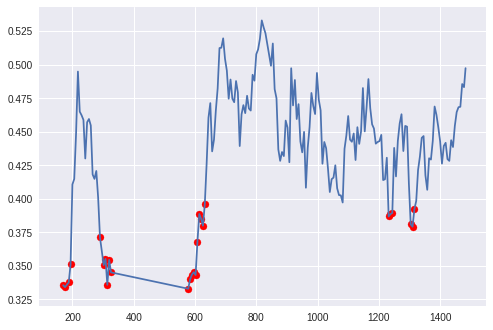

In [29]:
## 3. 노이즈 거르기 도저언
sim_mean = sim_val_wn.mean()
sim_std = sim_val_wn.std()
thresh = sim_mean - sim_std
print("thresh: ", thresh)

boundary_list_thresh2 = [key for key, val in sim_without_noise.items() if val < thresh]
print(boundary_list_thresh2)

## 그래프
thresh4graph2 = {}
for k,v in sim_without_noise.items():
  if v < thresh:
    thresh4graph2[k] = v
    
plt.plot(sim_without_noise.keys(),sim_without_noise.values())
plt.scatter(thresh4graph2.keys(), thresh4graph2.values(), c='red')

In [30]:
## 3. 노이즈 거르기 도저언
## 점 사이의 간격이 하나의 토픽보다 크면 그 이전의 경계들은 하나로 취급
tmp_list2 = []
tmp_idx = 0
for i in range(len(boundary_list_thresh2)-1):
  if (boundary_list_thresh2[i+1]-boundary_list_thresh2[i])>window_size:
    tmp_list2.append(boundary_list_thresh2[tmp_idx:i+1])
    tmp_idx = i+1
tmp_list2.append(boundary_list_thresh2[tmp_idx:]) #경계는 마지막 것도 확실하게 챙기자
print(tmp_list2)

[[170, 176, 188, 194, 290, 302, 308, 314, 320, 326], [578, 584, 590, 596, 602, 608, 614, 620, 626, 632], [1232, 1238, 1244, 1304, 1310, 1316]]


In [31]:
## 3. 노이즈 거르기 도저언
## 앞서 찾아낸 군집에서 유사도가 가장 작은 토큰의 인덱스 찾기
boundary_test2 = []
for li in tmp_list2:
  min=1
  k=0
  for v in li:
    if(thresh4graph2[v] < min):
      k = v
      min=thresh4graph2[v]
  boundary_test2.append(k)

print(boundary_test2)

[176, 578, 1310]


In [0]:
## 1과 2 중 boundary 선택
boundary_list = boundary_test2

In [33]:
## 해당 토큰이 속한 문장
i = boundary_list[0]
print("경계 토큰: ", tokens[i])
idx = tokens[i].index
print("해당 토큰의 문장 인덱스: ", idx)
print("해당 토큰이 속한 문장: ", sentences[idx].tokens)

경계 토큰:  좋다
해당 토큰의 문장 인덱스:  31
해당 토큰이 속한 문장:  [좋다]


In [0]:
## 찾아낸 경계 토큰으로 클러스터 나누기
## 토큰이 문장의 앞뒤로 나눈 절반 중 어디에 속한지 알아내서 경계 나눔
start = 0
cluster = []
for b in boundary_list:
    token = tokens[b]
    idx = token.index
    sen_tokens = [t.word for t in sentences[token.index].tokens]
    pos = sen_tokens.index(str(token))
    if(pos<len(boundary_list)//2):
        cluster.append(sentences[start:idx+1])
        start=idx+1
    else:
        cluster.append(sentences[start:idx])
        start=idx
if(start<len(sentences)):
    cluster.append(sentences[start:])

In [35]:
## 클러스터별 문장과 각 페이지랭크 값 출력
for i, c in enumerate(cluster):
    print("[cluster{}]".format(i+1))
    for j, s in enumerate(c):
        print("문장{}: {}".format(j, s.text))

[cluster1]
문장0: 좋아요
문장1: 자 음 이번은 프로젝트를 위한 킥 오프 미팅입니다
문장2: 음 그리고 음 이것은 우리가 앞으로 25분 동안 할 일입니다.
문장3: 우선 서로 확실하게 하기 위해서 저는 로라고 프로젝트 매니저입니다
문장4: 다시 한번 자기소개 해 주시겠어요
문장5: 음 좋습니다
문장6: 안녕하세요
문장7: 저는 데이 비드고 산업 디자이너입니다
문장8: 그렇군요
문장9: 저는 앤드류이고 음 마케팅 팀입니다
문장10: 음 전 크레이 그이고 사용자 인터페이스입니다
문장11: 전 문 가죠 좋아요
문장12: 자 음 저희는 새로운 리모콘을 만들고 있어요
문장13: 오 누가 진짜 여기 있는지 기록해야 해요 데이 비드 앤드류 크레이 즈 맞죠
문장14: 그리고 모두 제시간에 도착했고요
문장15: 음 그래서 디자 흠 새로운 리모콘을 만들고 있습니다
문장16: 음 보이시는 대로 독창적이고 유행에 민감하고 사용자가 사용하기 편리해 보입니다
문장17: 음 디자인에는 세가지 단계가 있습니다
문장18: 음 다 들 이메일로 뭘 받았는지 잘 모르겠네요
문장19: 어떤 것을 받으셨나요
문장20: 음 방금 이 프로젝트가 무엇인 지에 대한 프로젝트 발표를 받았습니다
문장21: 리모콘을 설계하는 그게 다예요 다른 건 못 받았습니다
문장22: 다들 같은 거 받으셨나요
문장23: 흐 음 흠 흠 네 같은 것 같네요
문장24: 다들 똑같은 거 받으신 건가요
문장25: 좋아요
문장26: 음 그럼 개인적인 일을 하고 나서 회의를 하는 게 좋겠네요
문장27: 그리고 이 과정을 세 번 반복하세요
문장28: 음 그리고 이제 화이트 보드를 사용할게요
문장29: 음 좋아하는 동물을 그려서 그것의 좋아하는 특징을 요약해 보세요 누가 먼저하실래요
문장30: 좋아요
문장31: 좋군요
[cluster2]
문장0: 제가 하겠습니다
문장1: 그게 좋겠어요
문장2: 잘 됐네요
문장3: 좋아요
문장4: 그럼 여기 이거 맞죠
문장5: 음 좋아요
문장6: 아무 멋있어요
문장7: 좋아 제가 가장 좋아하는 동물

In [0]:
def sim(sen1, sen2):
  b1 = tfidv.transform([" ".join(map(str, sen1.tokens))]).toarray().reshape(-1)
  b2 = tfidv.transform([" ".join(map(str, sen2.tokens))]).toarray().reshape(-1)
  return cosine_similarity_def(b1,b2)

In [0]:
def similarity_matrix(sentences):
  matrix = np.zeros((len(sentences), len(sentences)))
  for i, sen1 in enumerate(sentences):
    for j, sen2 in enumerate(sentences):
      matrix[i, j] = sim(sen1, sen2)

  return matrix
matrix = similarity_matrix(cluster[0])

In [0]:
def sentences2graph(sentences):
    graph = networkx.Graph()
    graph.add_nodes_from(sentences)
    for i, sen1 in enumerate(sentences):
        for j, sen2 in enumerate(sentences):
            weight = matrix[i, j]
            if weight:
                graph.add_edge(sen1, sen2, weight=weight)
    return graph
graph = sentences2graph(cluster[0])

In [0]:
pagerank = networkx.pagerank(graph, weight='weight')

In [40]:
for c in cluster:
  matrix = similarity_matrix(c)
  graph = sentences2graph(c)
  pagerank = networkx.pagerank(graph, weight='weight', max_iter=10000)
  pagerankT = []
  for k,v in pagerank.items():
    pagerankT.append((k,v))
  pagerankS = sorted(pagerankT, key = lambda x: x[1], reverse=True)  
  for i in range(5):
    print(pagerankS[i][0].text)

다들 같은 거 받으셨나요
음 그럼 개인적인 일을 하고 나서 회의를 하는 게 좋겠네요
좋아요
음 좋습니다
좋아요


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


PowerIterationFailedConvergence: ignored

In [84]:
for k,v in pagerank.items():
  print(k,v)
  
pagerankT = []
for k,v in pagerank.items():
  pagerankT.append((k,v))

pagerankS = sorted(pagerankT, key = lambda x: x[1], reverse=True)  

for k,v in pagerankS:
  print(k,v)

0 0.04488746911700222
1 0.04035905694023385
2 0.037408589538241235
3 0.06074256231378907
4 0.06832416953166029
5 0.044479182850353814
6 0.0621937457472576
7 0.03727263636161781
8 0.047619047619047616
9 0.047233619125836915
10 0.056021086605251146
11 0.05350789701356621
12 0.05935753538490296
13 0.03681001102581911
14 0.03712756558245971
15 0.04168623733722022
16 0.03760512476633958
17 0.05347175699717836
18 0.03943915167417905
19 0.04291140811565199
20 0.051542146352391544
4 0.06832416953166029
6 0.0621937457472576
3 0.06074256231378907
12 0.05935753538490296
10 0.056021086605251146
11 0.05350789701356621
17 0.05347175699717836
20 0.051542146352391544
8 0.047619047619047616
9 0.047233619125836915
0 0.04488746911700222
5 0.044479182850353814
19 0.04291140811565199
15 0.04168623733722022
1 0.04035905694023385
18 0.03943915167417905
16 0.03760512476633958
2 0.037408589538241235
7 0.03727263636161781
14 0.03712756558245971
13 0.03681001102581911


In [71]:
cluster[0][4].text

'네, 경영자 총협회와 중소기업 중앙회는 각각 지난달 23일과 26일 내년도 최저임금 안에 대한 이의 제기서를 제출했는데요. 쉽게 말해 최저임금 위에서 결정한 내년 최저임금이 부담을 감내할 수준이 아니니 다시 논의해야 된다는 건데요. 경 총은 " 경기 둔화 국면에서 2년 새 최저임금이 29.1% 인상된다면, 경영여건이 열악한 기업은 한계 상황으로 내몰리고 고용 부진이 심화할 것" 이라고 주장했습니다.'